In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
conda install -c conda-forge missingno 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/cchavez/opt/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_1
  python_abi         conda-forge/osx-64::python_abi-3.7-1

# New Section

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9


EDA “is an approach to analyzing datasets to summarize their main characteristics, often with visual methods”. 

In my own words, it is about knowing your data, gaining a certain amount of familiarity with the data, before one starts to extract insights from it.


To gain an understanding of data and find clues from the data,
to formulate assumptions and hypothesis for our modelling; and
to check the quality of data for further processing and cleaning if necessary.
To check for features that can help in forecasting sales; and
To check for anomalies or outliers that may impact our forecasting model.

General Outline of EDA
Our code template shall perform the following steps:
Preview data
Check total number of entries and column types
Check any null values
Check duplicate entries
Plot distribution of numeric data (univariate and pairwise joint distribution)
Plot count distribution of categorical data
Analyze time series of numeric data by daily, monthly and yearly frequencies



**Preliminary Data Processing**

In [4]:
df = pd.read_csv('train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

 In a nutshell, there are three common types of data type (categorical, numeric and datetime) and we have different EDA procedures for each of them.

In [5]:
# set identifier "Id" as string
df['Id'] = df['Id'].astype('str')
df['MiscFeature'] = df['MiscFeature'].astype('str')
# set categorical data
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MSZoning'] = df['MSZoning'].astype('category')
df['Street'] = df['Street'].astype('category')
df['Alley'] = df['Alley'].astype('category')
df['LotShape'] = df['LotShape'].astype('category')
df['LandContour'] = df['LandContour'].astype('category')
df['Utilities'] = df['Utilities'].astype('category')
df['LotConfig'] = df['LotConfig'].astype('category')
df['LandSlope'] = df['LandSlope'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Condition1'] = df['Condition1'].astype('category')
df['Condition2'] = df['Condition2'].astype('category')
df['BldgType'] = df['BldgType'].astype('category')
df['HouseStyle'] = df['HouseStyle'].astype('category')
df['RoofStyle'] = df['RoofStyle'].astype('category')
df['RoofMatl'] = df['RoofMatl'].astype('category')
df['Exterior1st'] = df['Exterior1st'].astype('category')
df['Exterior2nd'] = df['Exterior2nd'].astype('category')
df['MasVnrType'] = df['MasVnrType'].astype('category')
df['ExterQual'] = df['ExterQual'].astype('category')
df['ExterCond'] = df['ExterCond'].astype('category')
df['Foundation'] = df['Foundation'].astype('category')
df['BsmtQual'] = df['BsmtQual'].astype('category')
df['BsmtCond'] = df['BsmtCond'].astype('category')
df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category')
df['BsmtFinType2'] = df['BsmtFinType2'].astype('category')
df['Heating'] = df['Heating'].astype('category')
df['HeatingQC'] = df['HeatingQC'].astype('category')
df['CentralAir'] = df['CentralAir'].astype('category')
df['Electrical'] = df['Electrical'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')
df['Functional'] = df['Functional'].astype('category')
df['FireplaceQu'] = df['FireplaceQu'].astype('category')
df['GarageType'] = df['GarageType'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['GarageQual'] = df['GarageQual'].astype('category')
df['GarageCond'] = df['GarageCond'].astype('category')
df['PavedDrive'] = df['PavedDrive'].astype('category')
df['PoolQC'] = df['PoolQC'].astype('category')
df['Fence'] = df['Fence'].astype('category')
df['SaleType'] = df['SaleType'].astype('category')
df['SaleCondition'] = df['SaleCondition'].astype('category')
# set datetime data
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'])
df['YearRemodAdd'] = pd.to_datetime(df['YearRemodAdd'])
df['GarageYrBlt'] = pd.to_datetime(df['GarageYrBlt'])
df['MoSold'] = pd.to_datetime(df['MoSold'])
df['YrSold'] = pd.to_datetime(df['YrSold'])

                    



In [6]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()



    
    

    



In [8]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [9]:
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

In [10]:
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")




To check: 
Unique count of non-numeric data

Id               1460
MSSubClass         15
MSZoning            5
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinType2        6
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
KitchenQual         4
Functional          7
FireplaceQu         5
GarageType          6
GarageFinish        3
GarageQual          5
GarageCond          5
PavedDrive          3
PoolQC              3
Fence               4
MiscFeature         5
SaleType

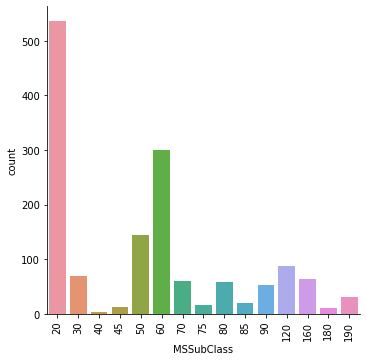

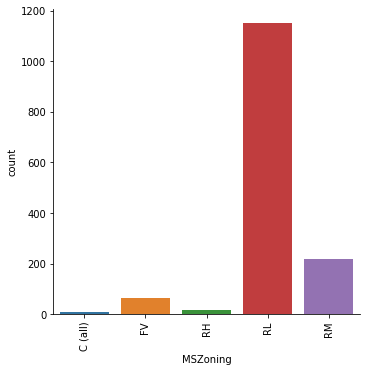

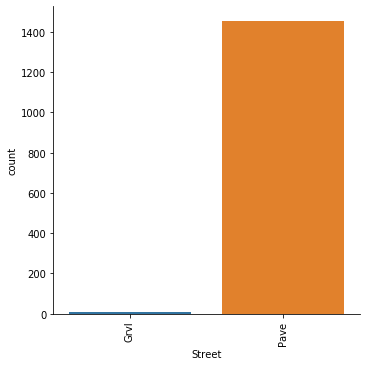

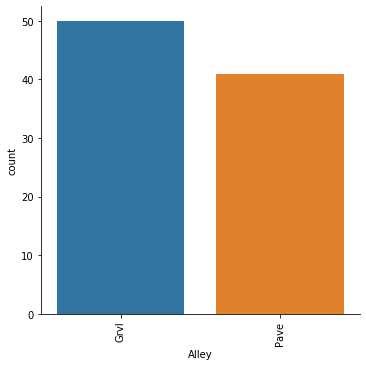

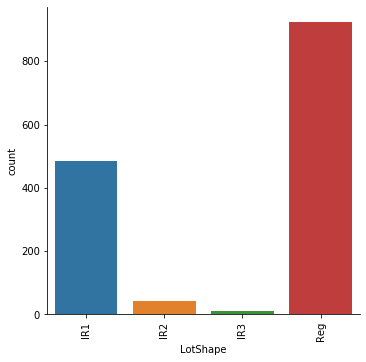

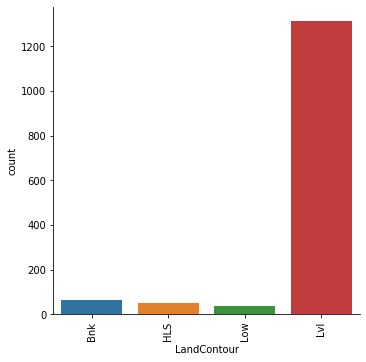

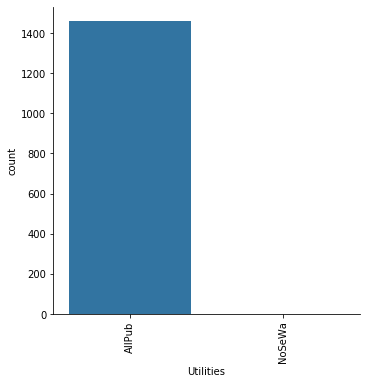

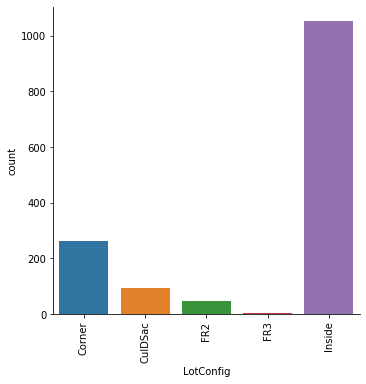

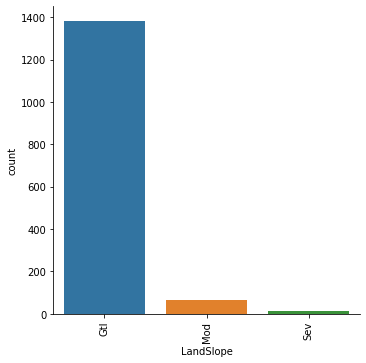

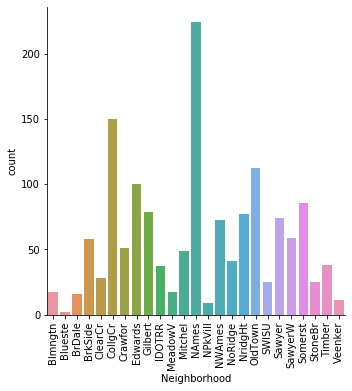

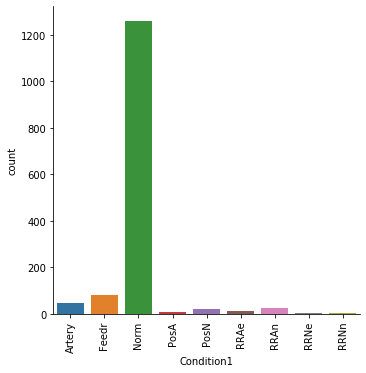

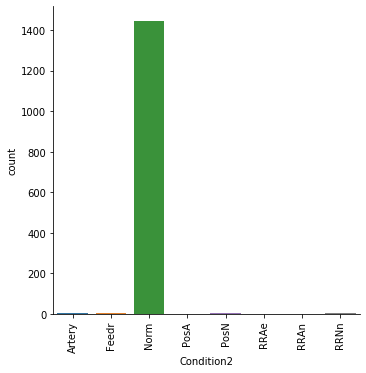

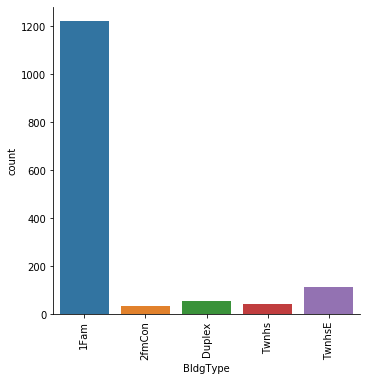

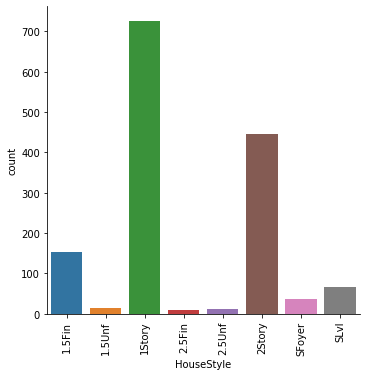

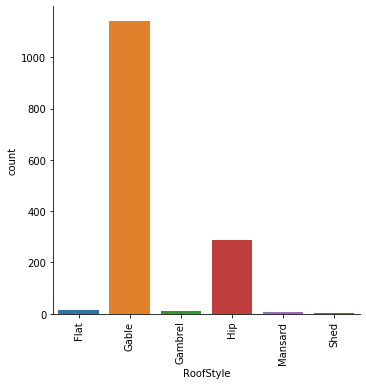

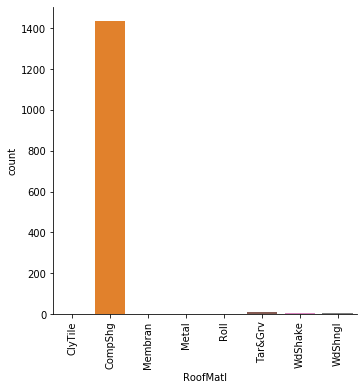

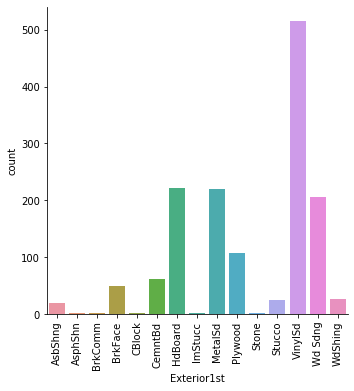

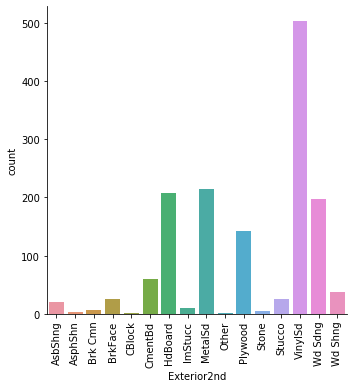

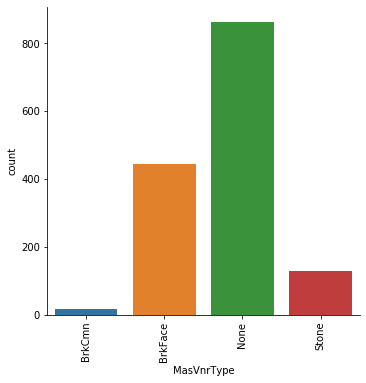

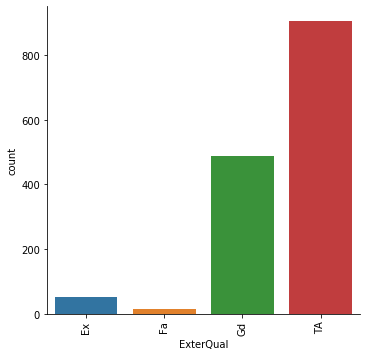

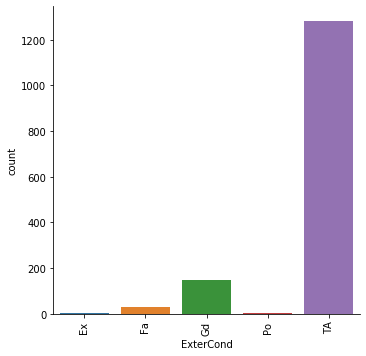

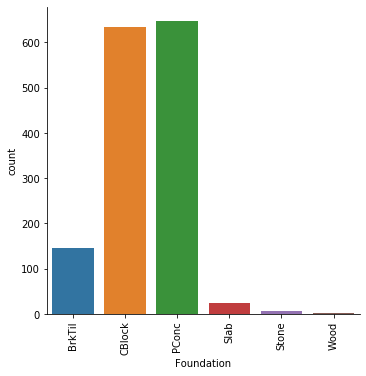

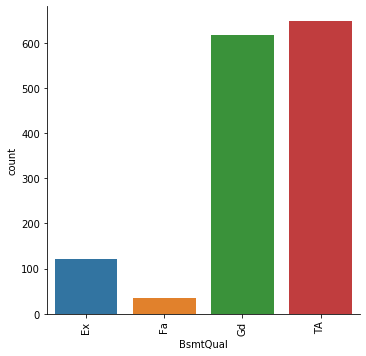

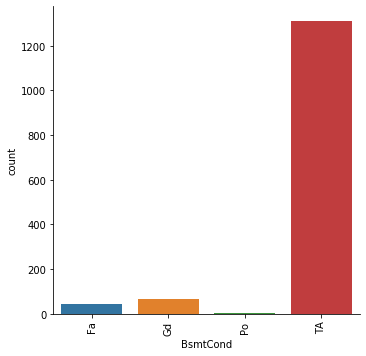

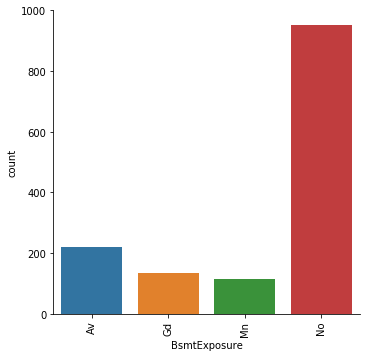

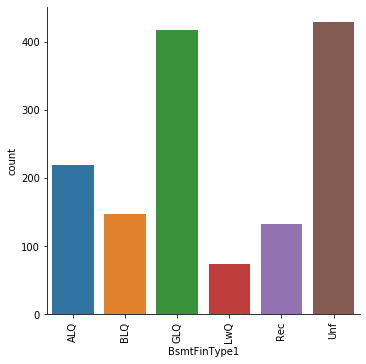

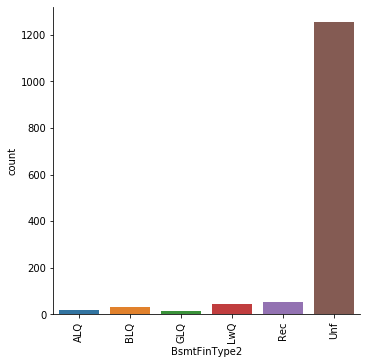

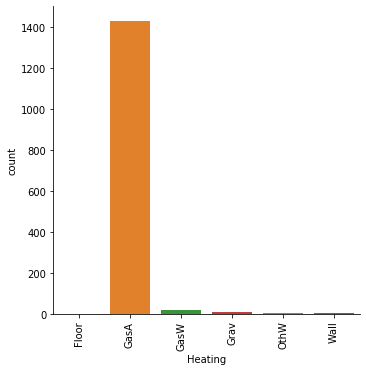

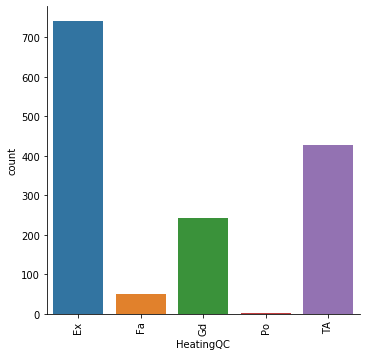

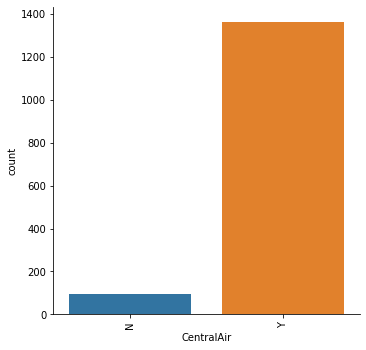

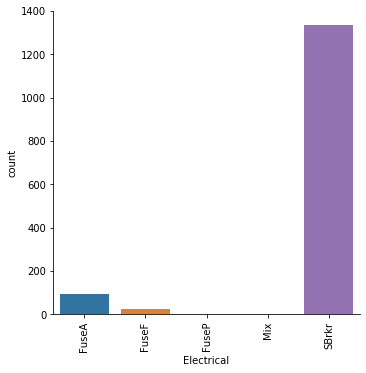

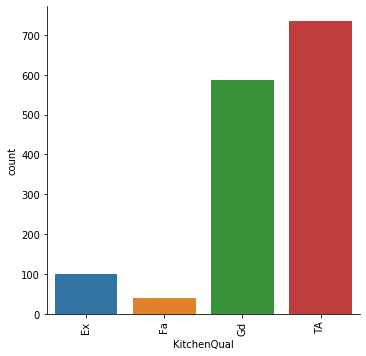

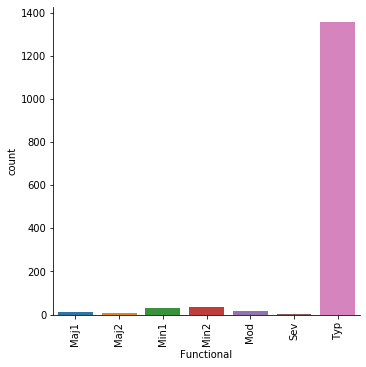

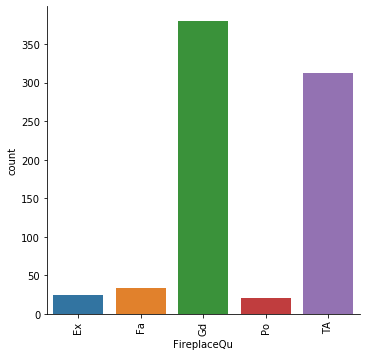

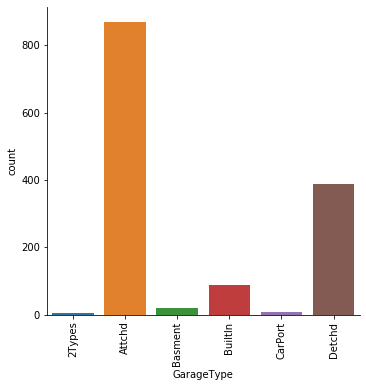

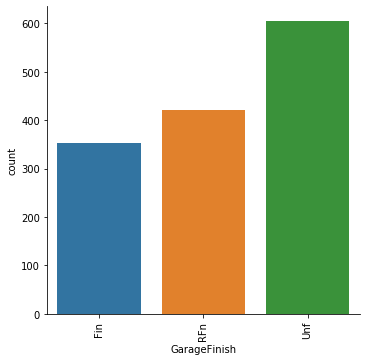

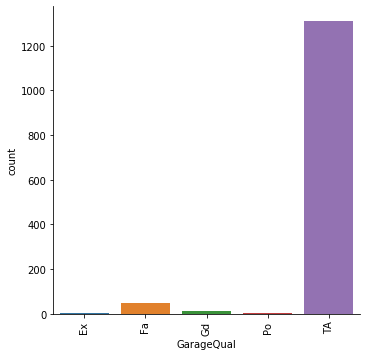

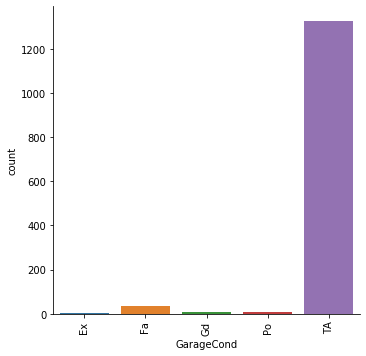

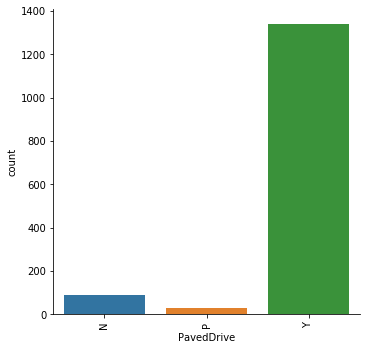

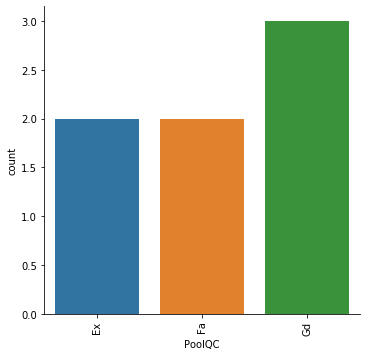

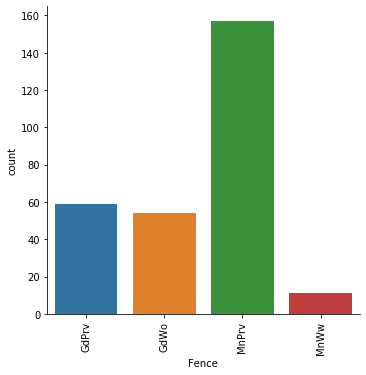

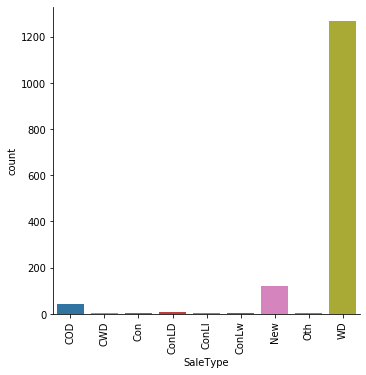

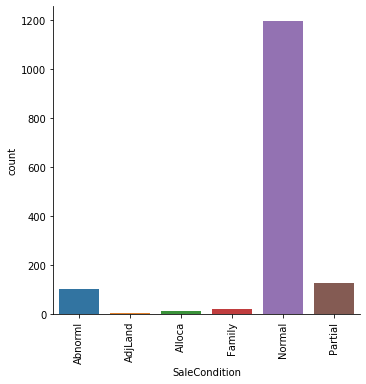

In [11]:
    # EDA of categorical data
    categorical_eda(df)
    



To check: 
Distribution of numeric data


count           mean           std      min        25%  \
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea            0.0       0.00     738.0  
MiscVal             0.0       0.00   15500.0  
SalePrice      163000.0  214000.00  755000.0

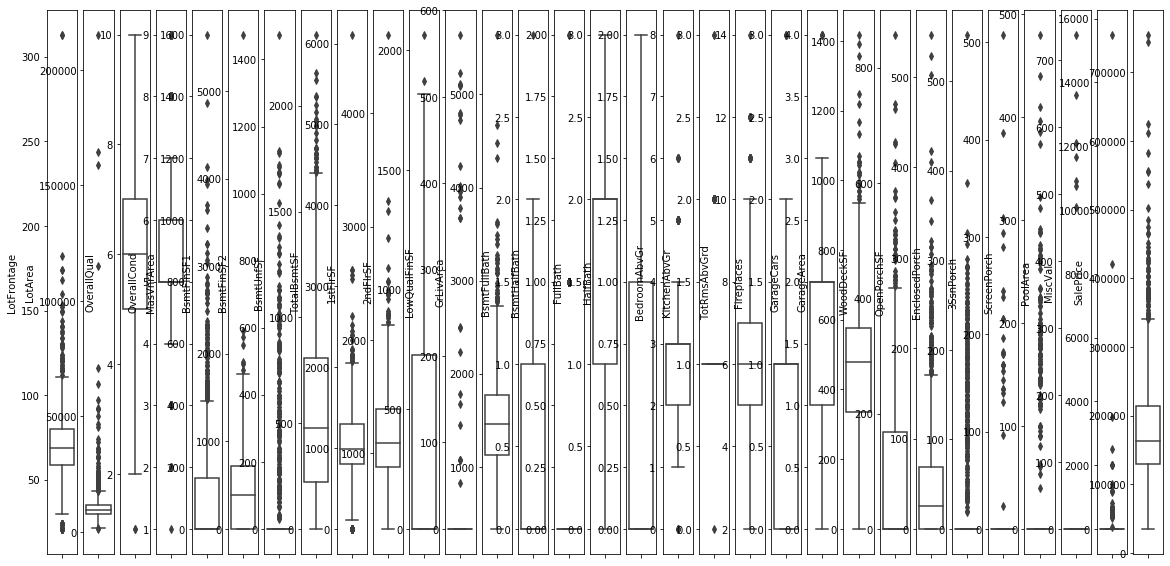

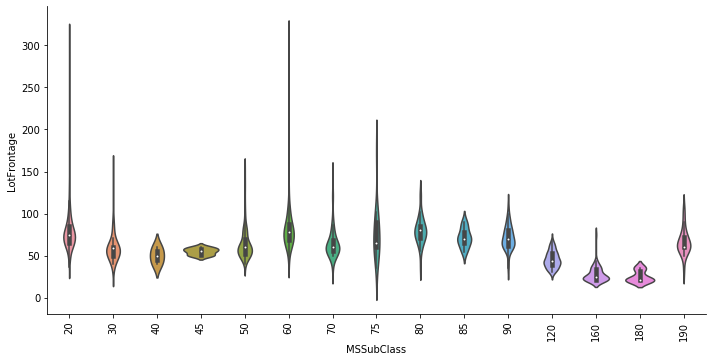

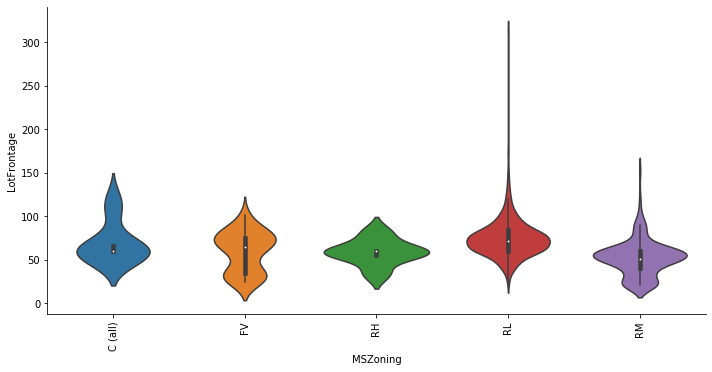

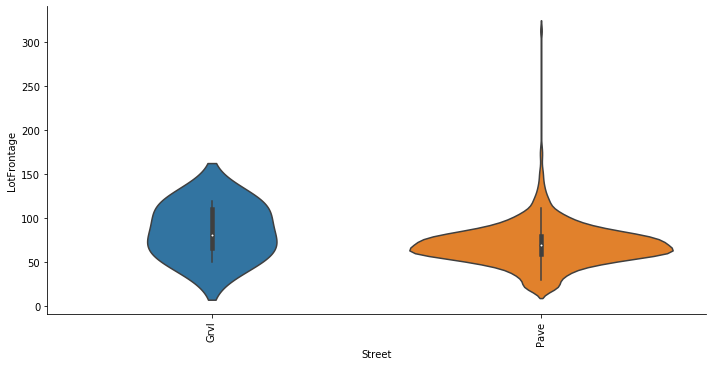

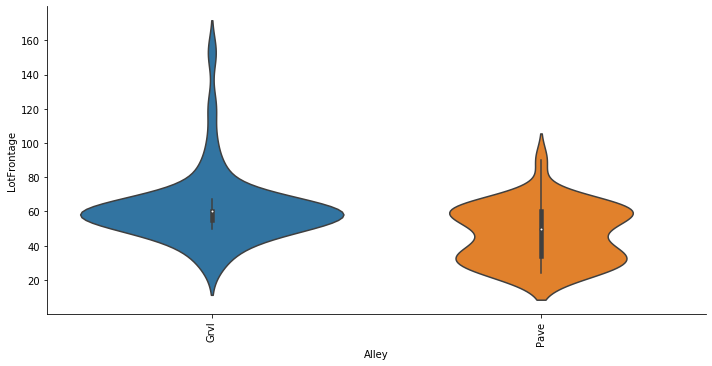

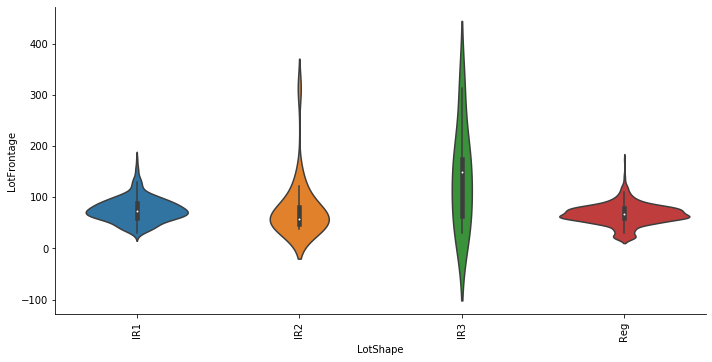

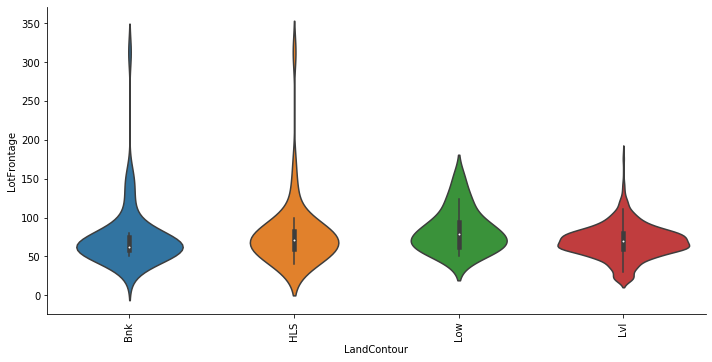

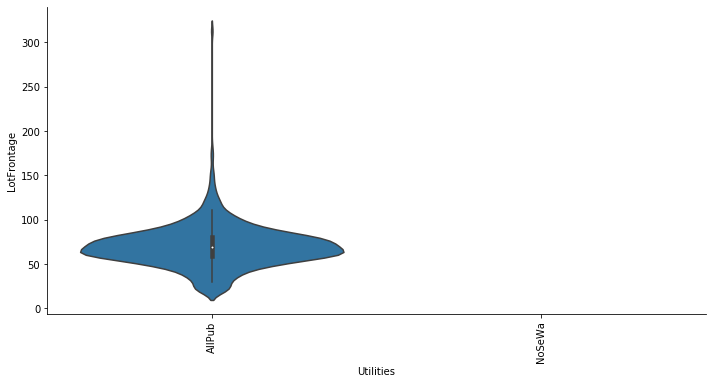

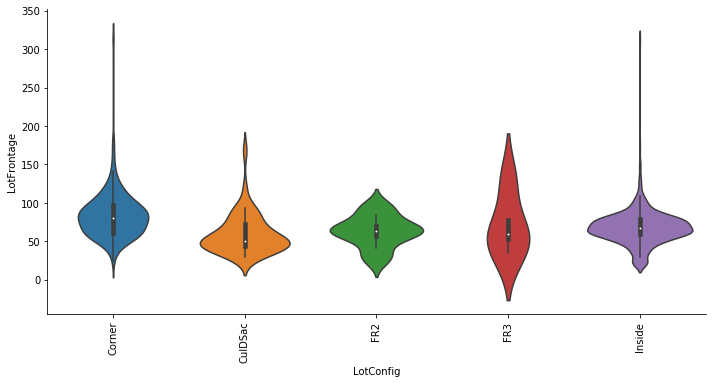

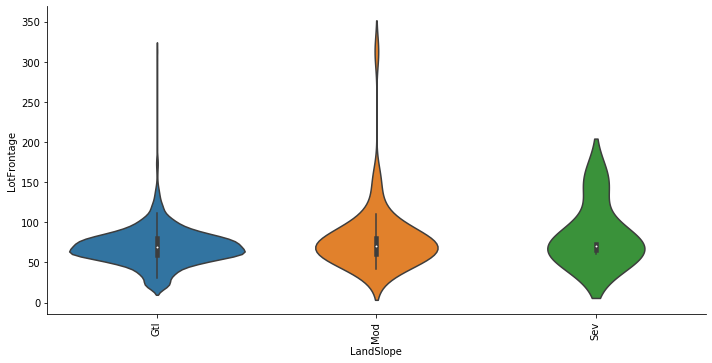

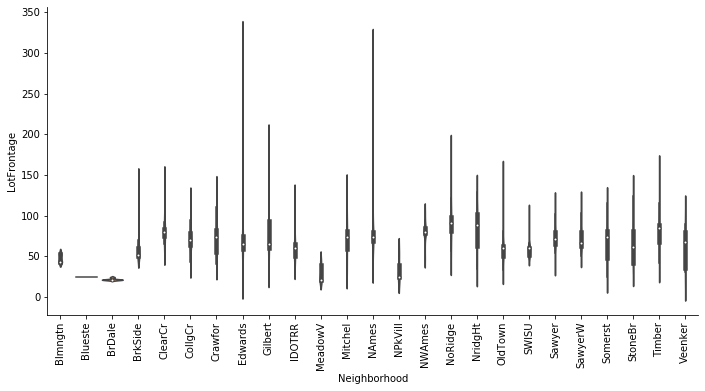

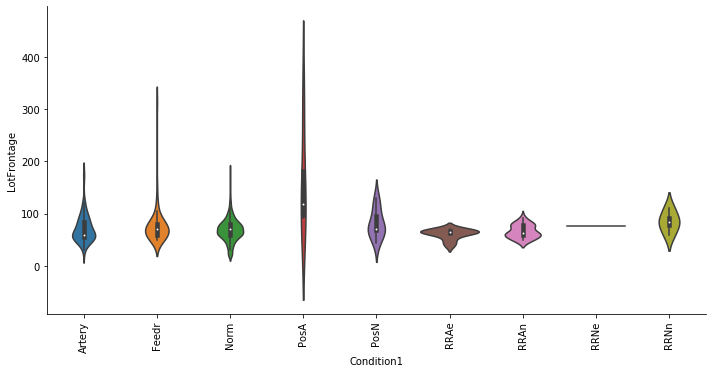

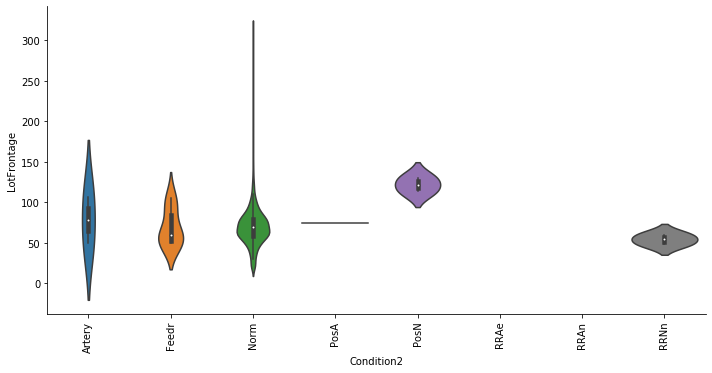

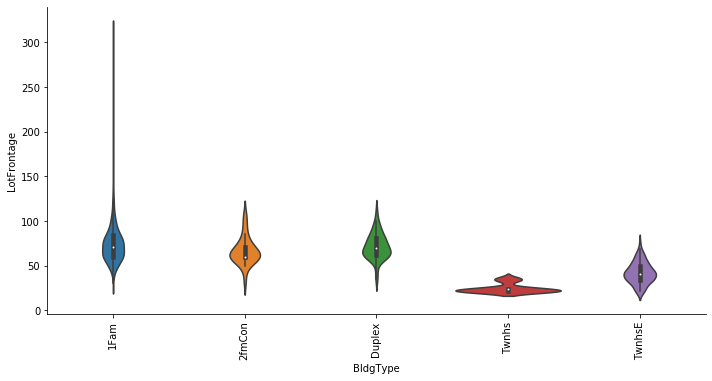

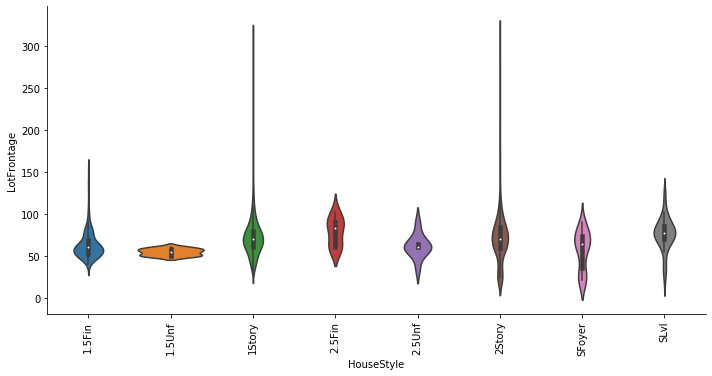

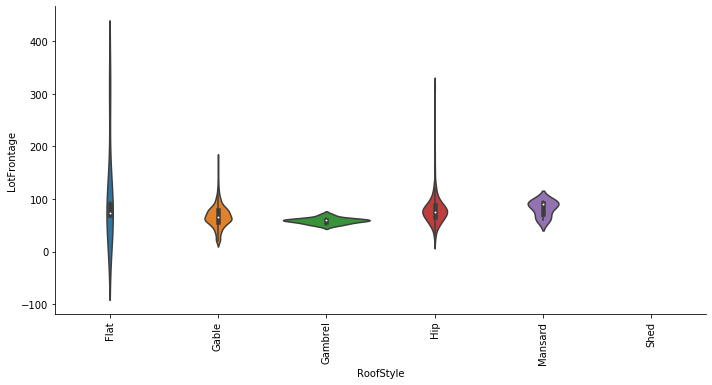

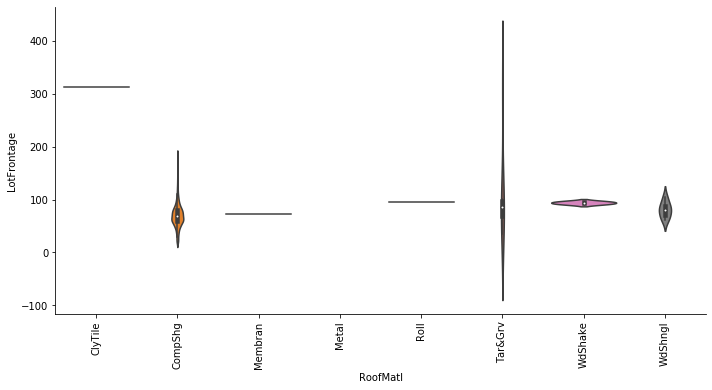

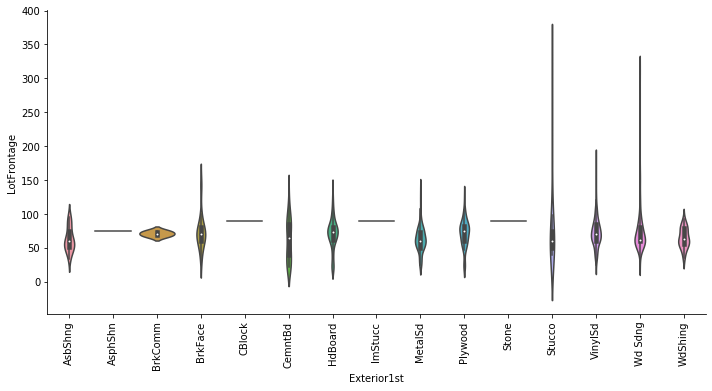

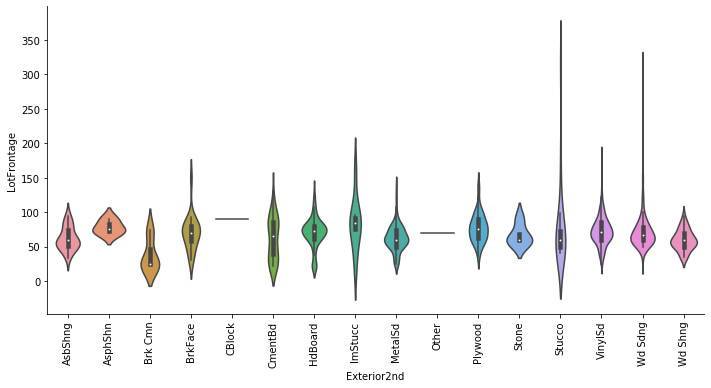

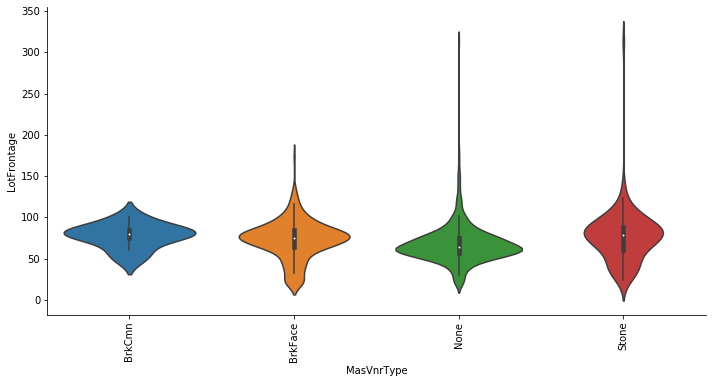

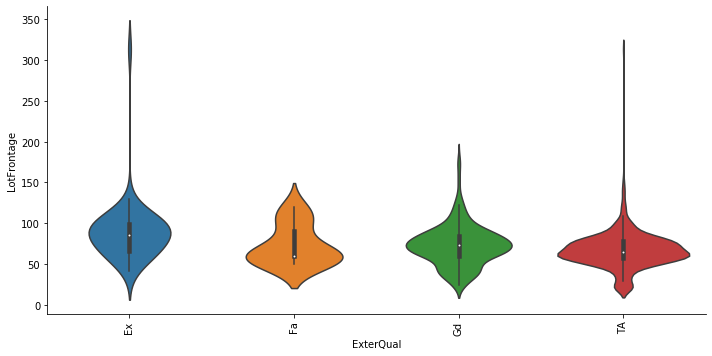

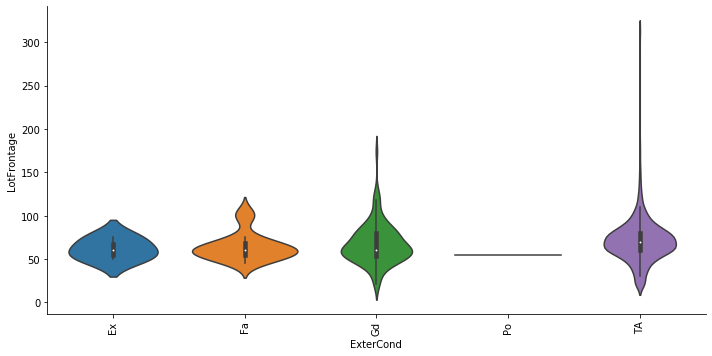

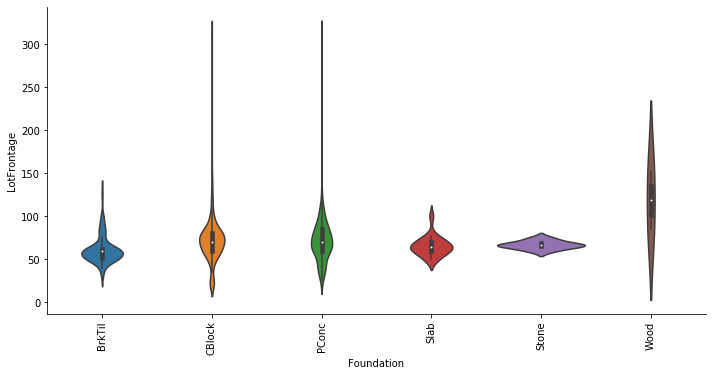

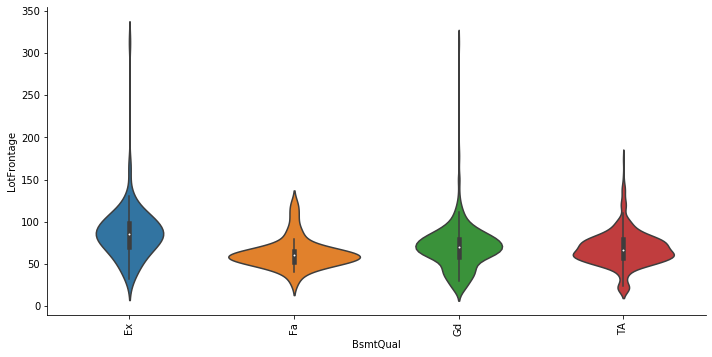

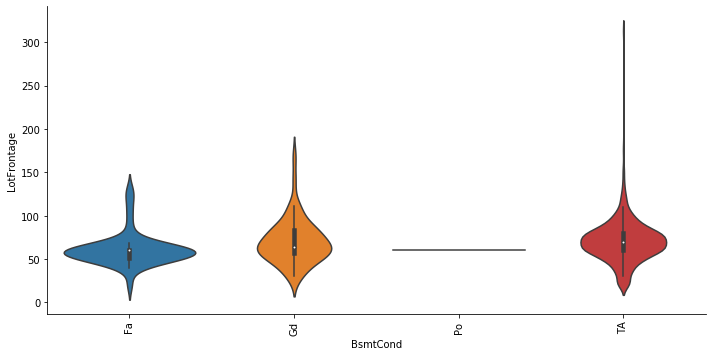

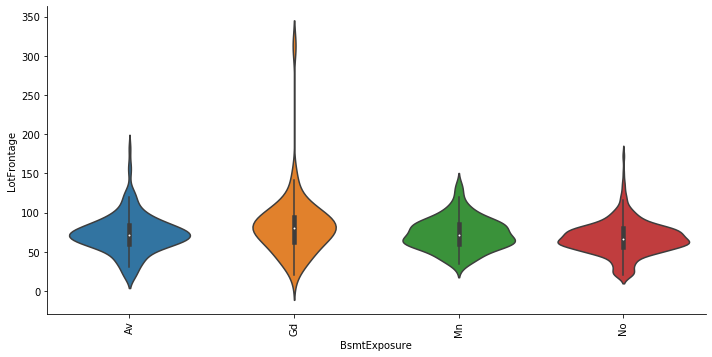

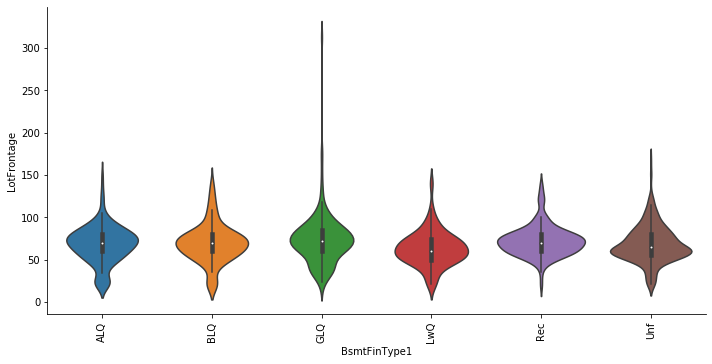

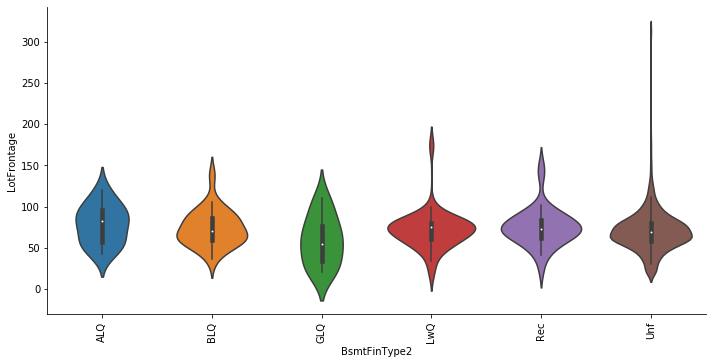

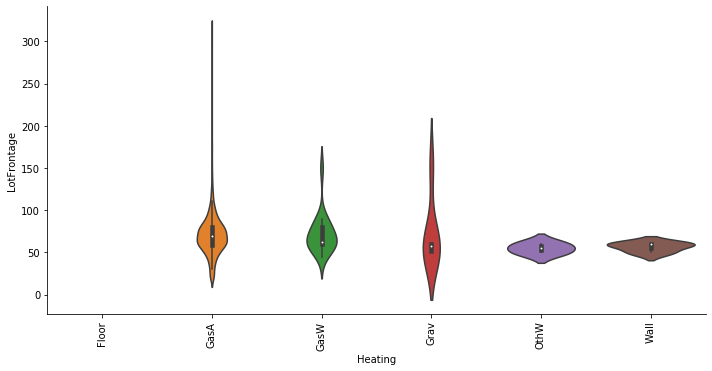

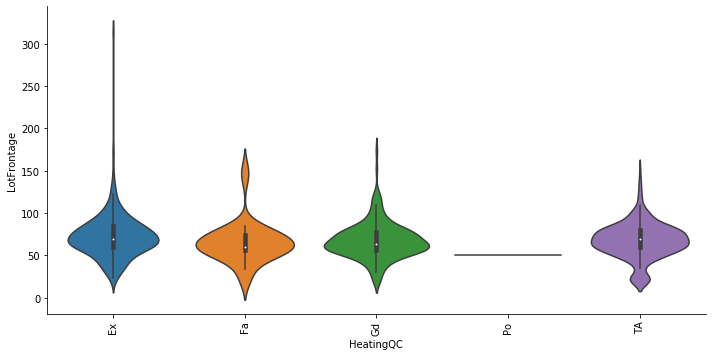

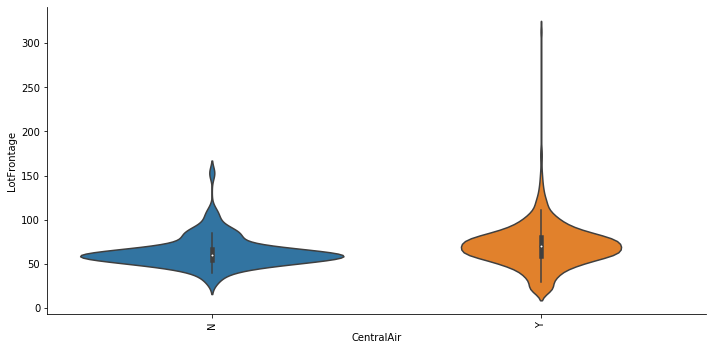

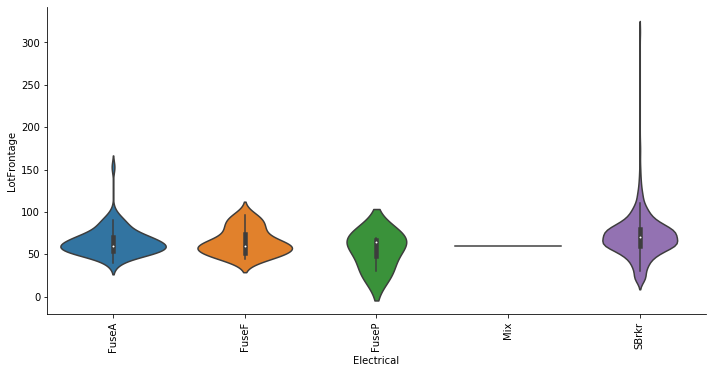

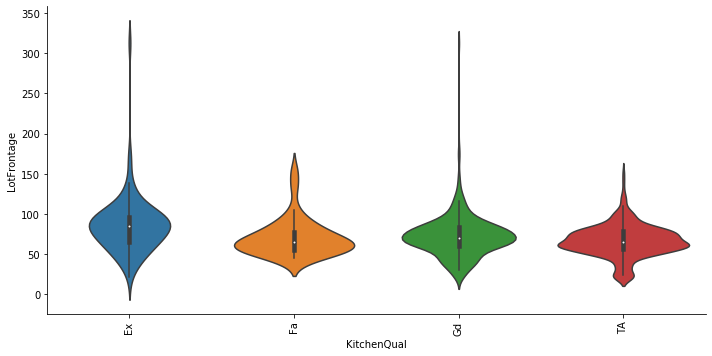

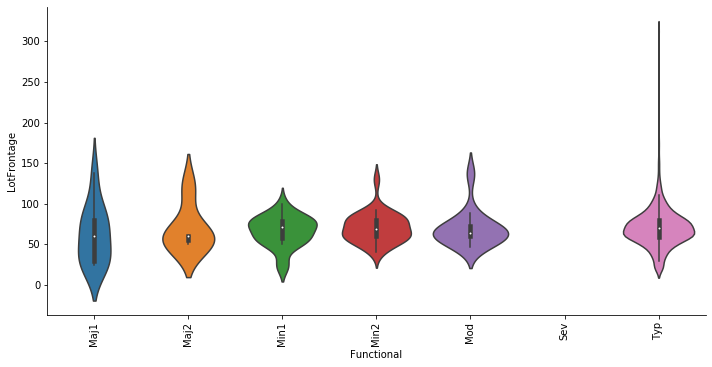

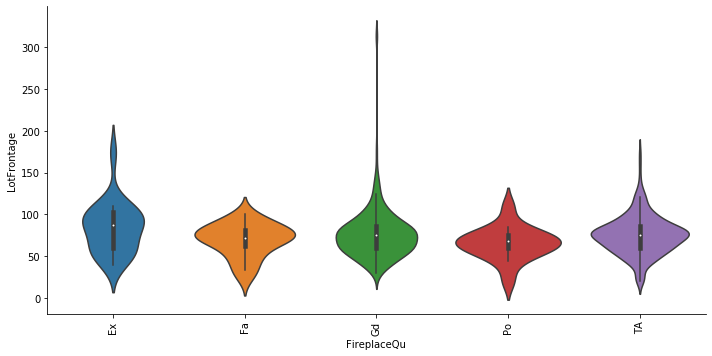

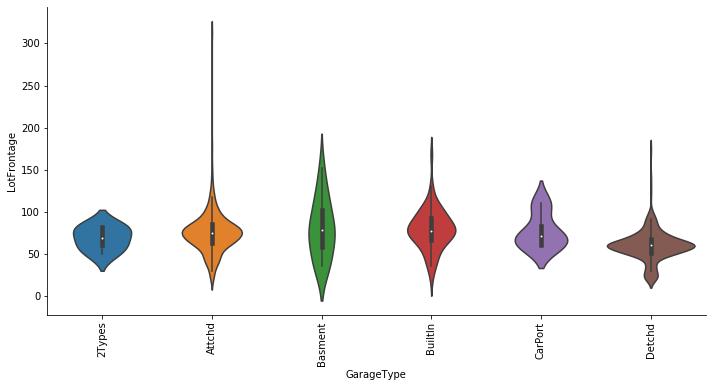

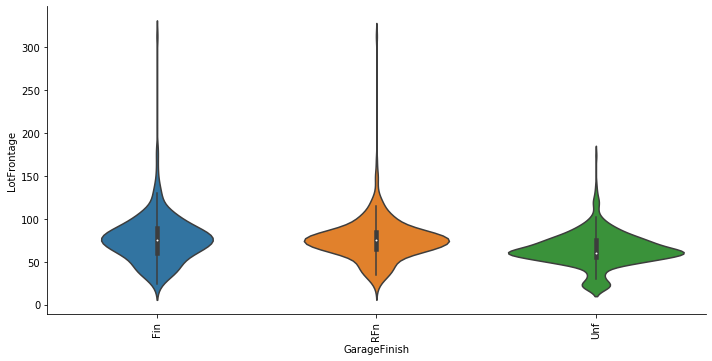

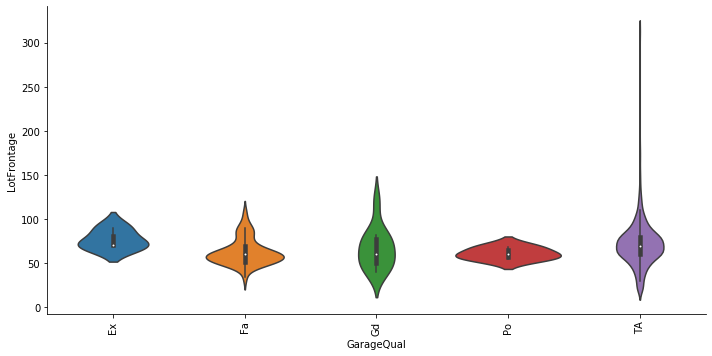

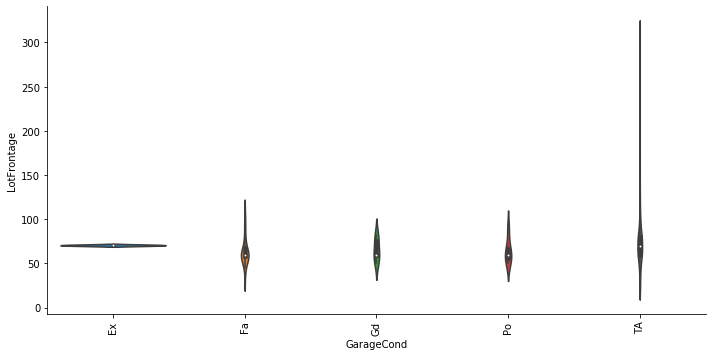

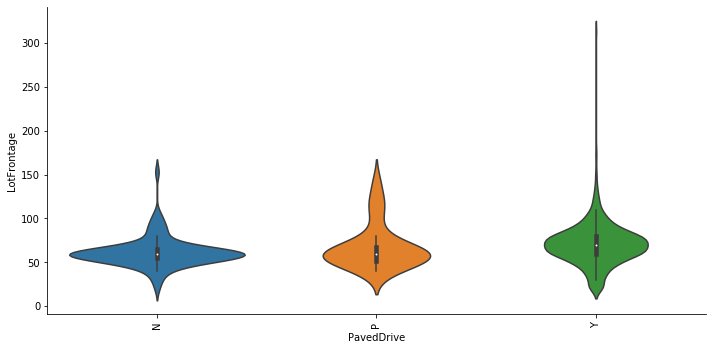

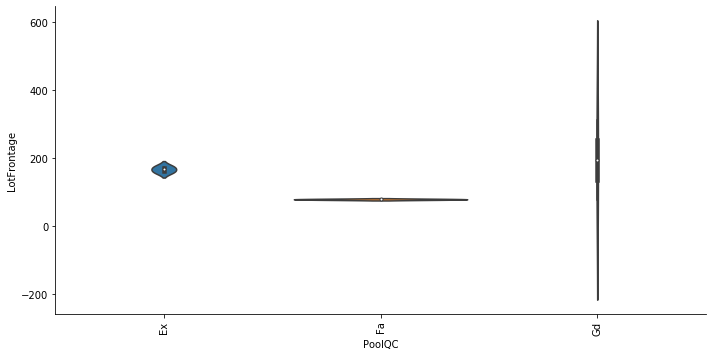

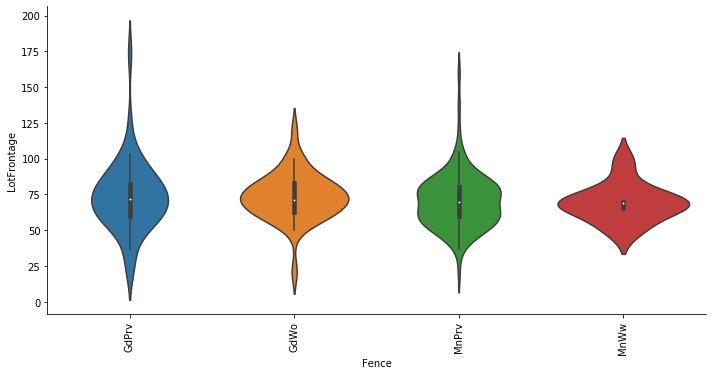

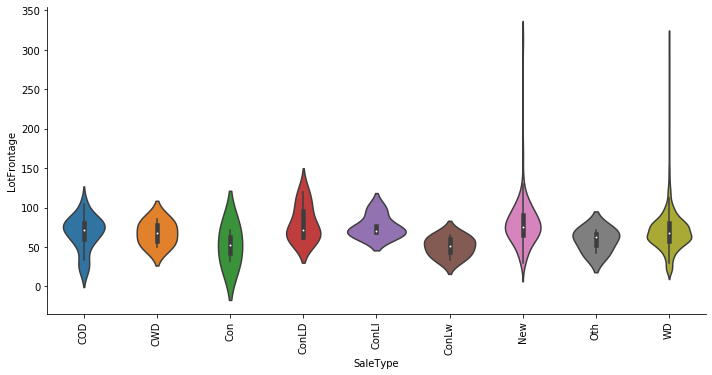

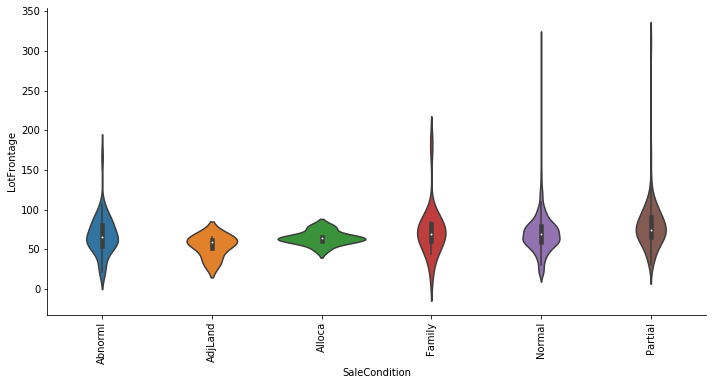

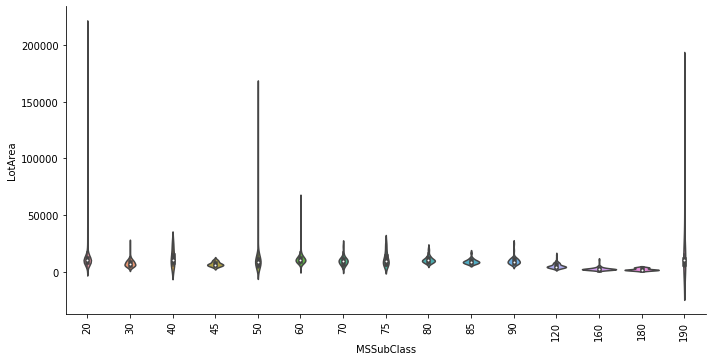

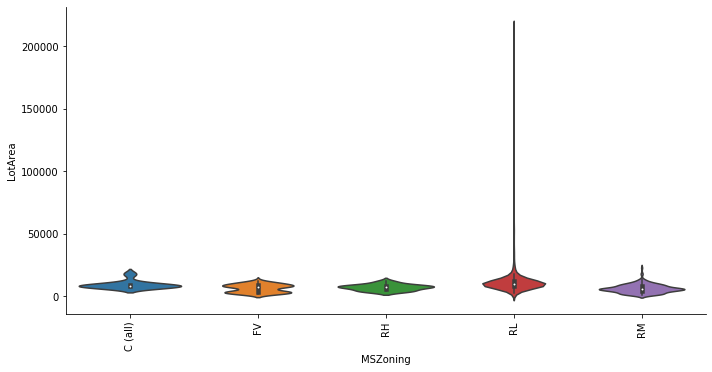

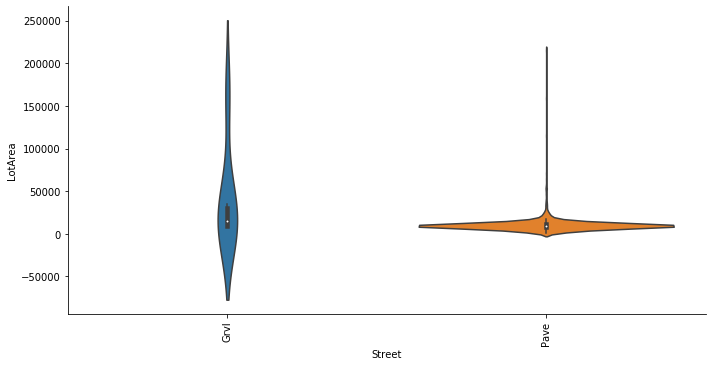

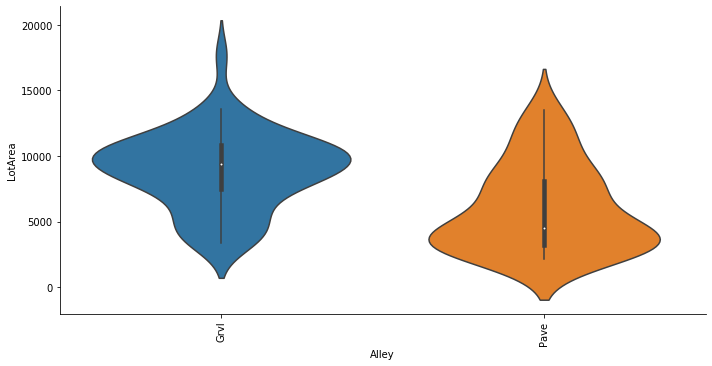

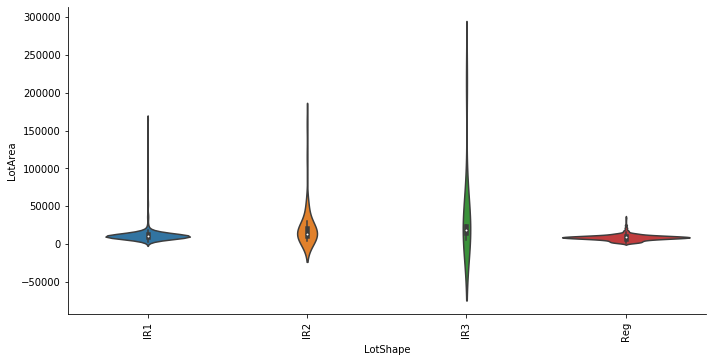

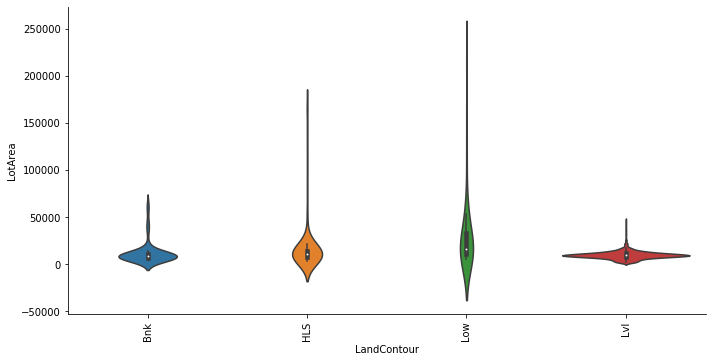

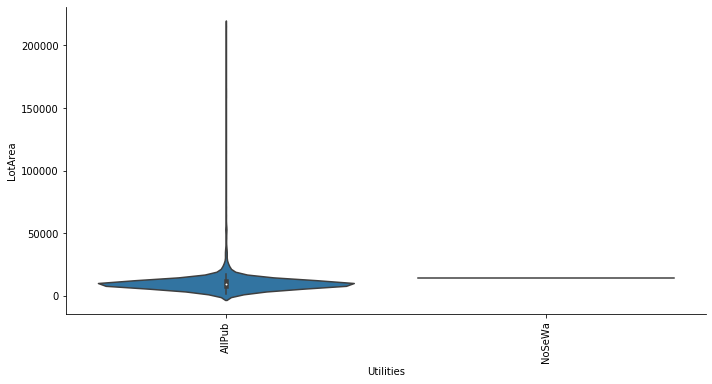

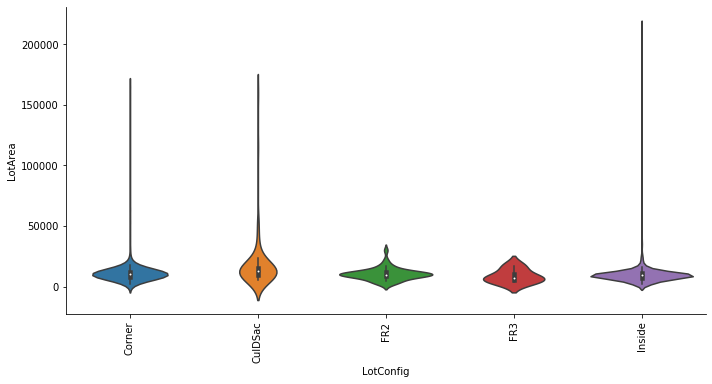

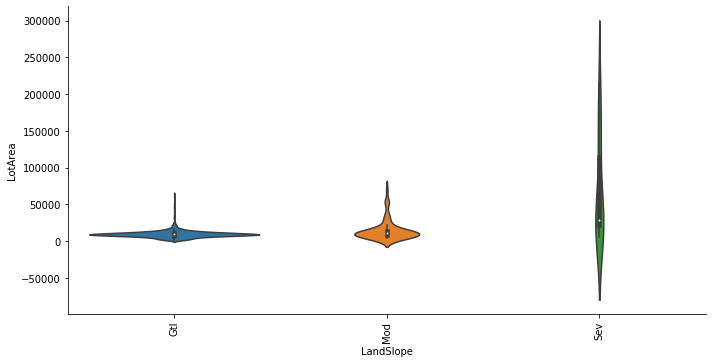

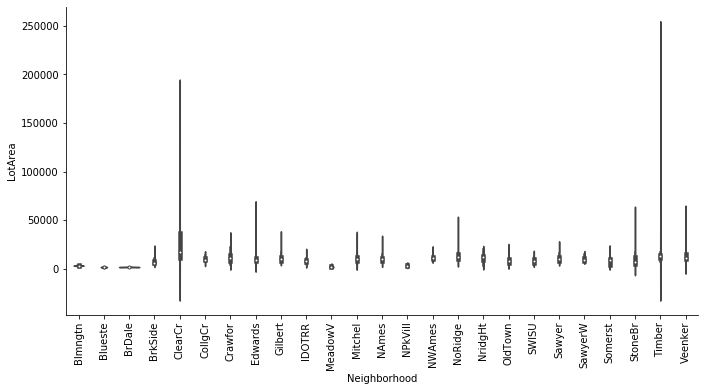

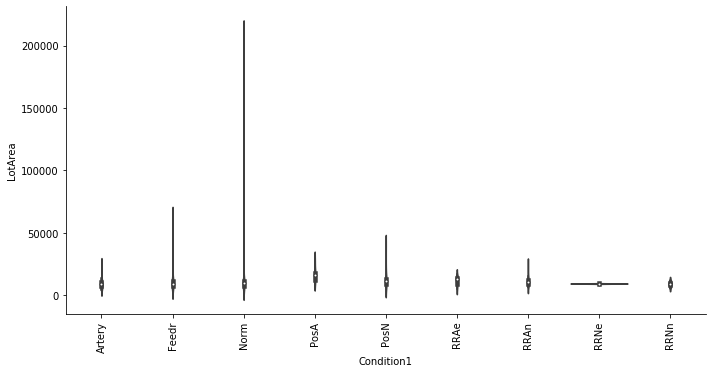

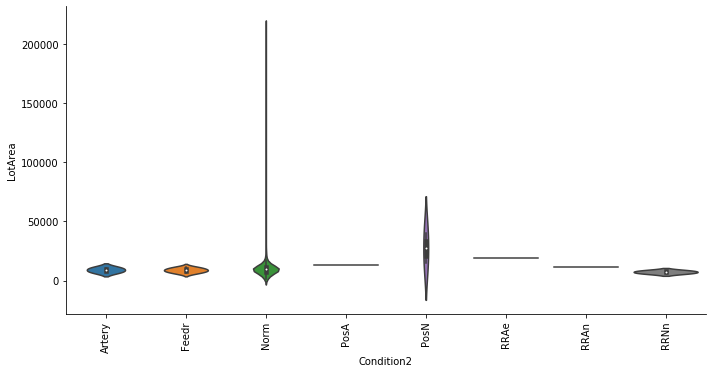

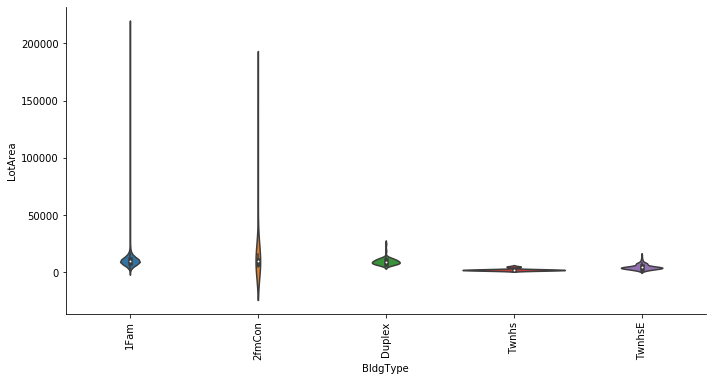

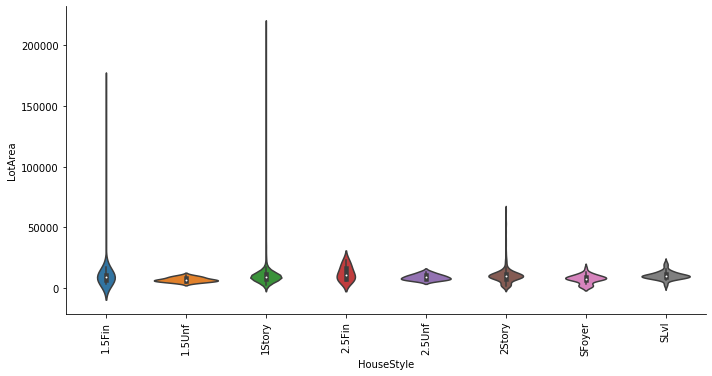

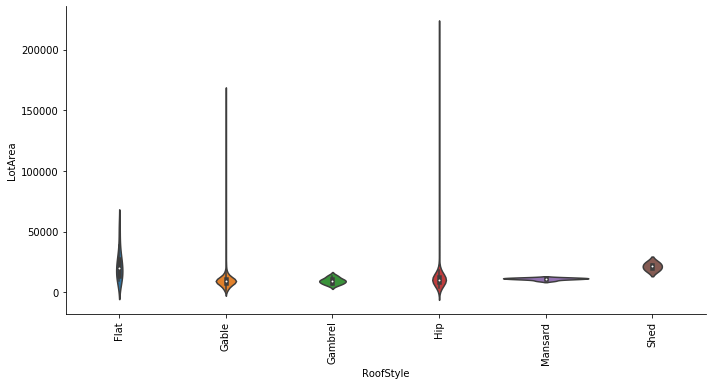

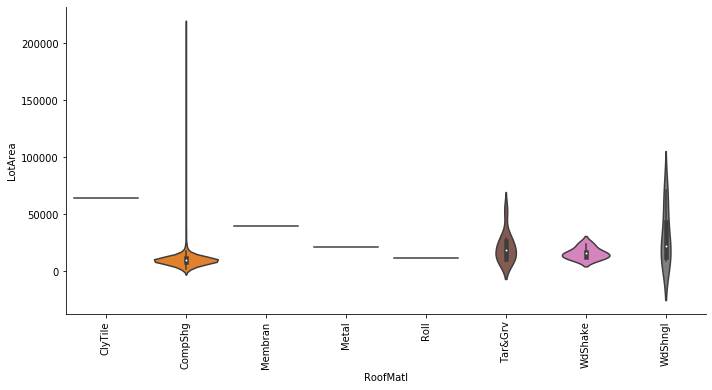

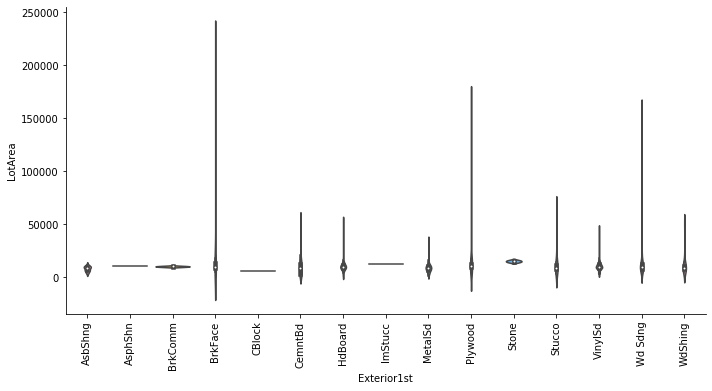

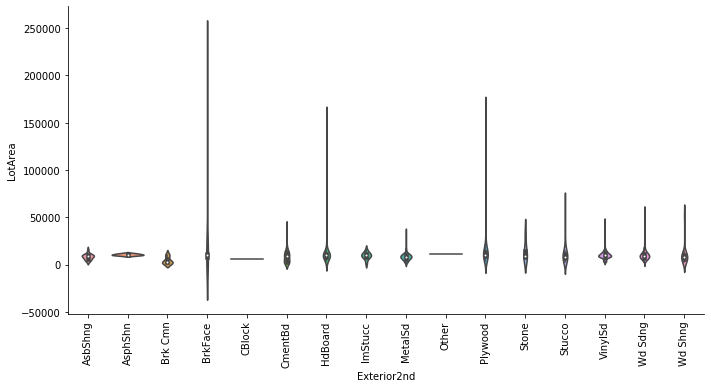

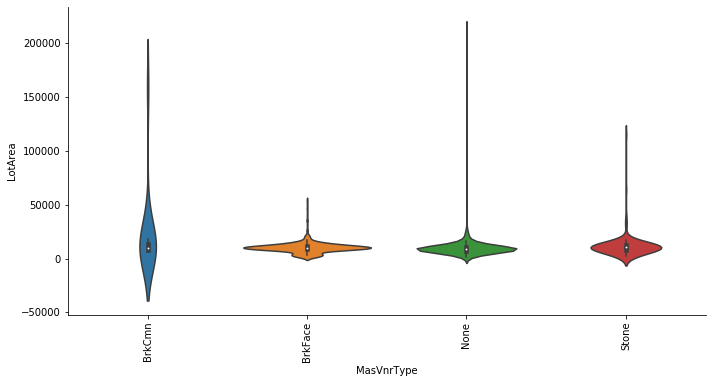

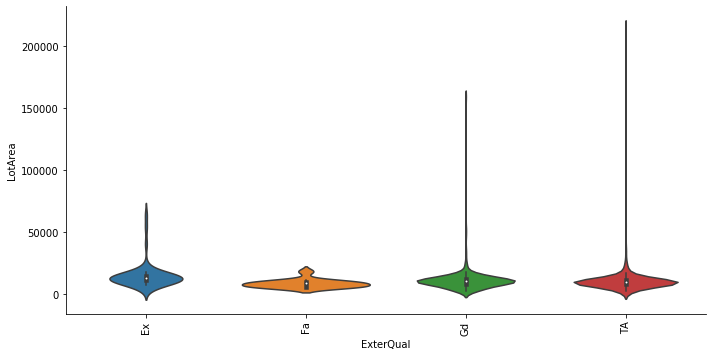

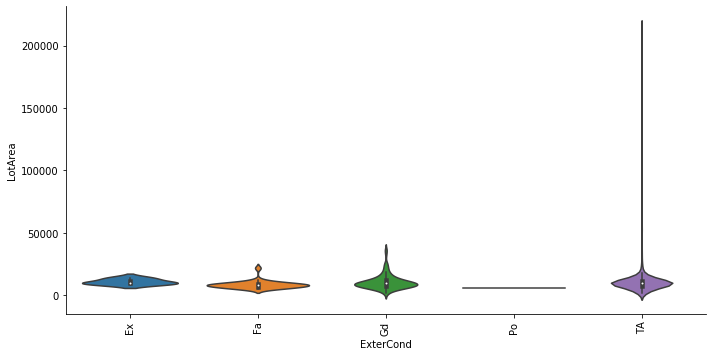

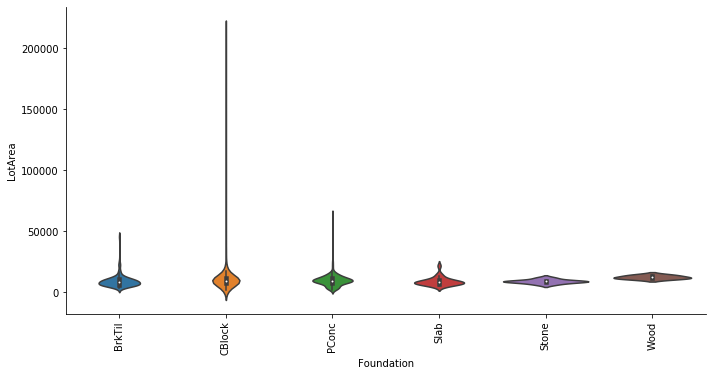

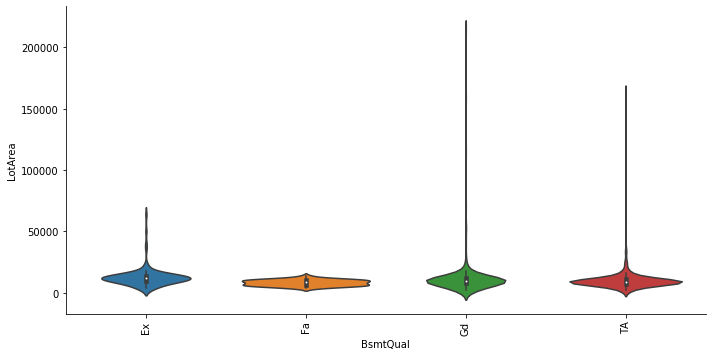

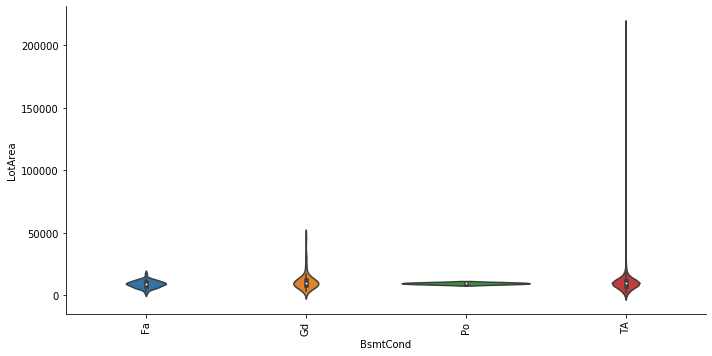

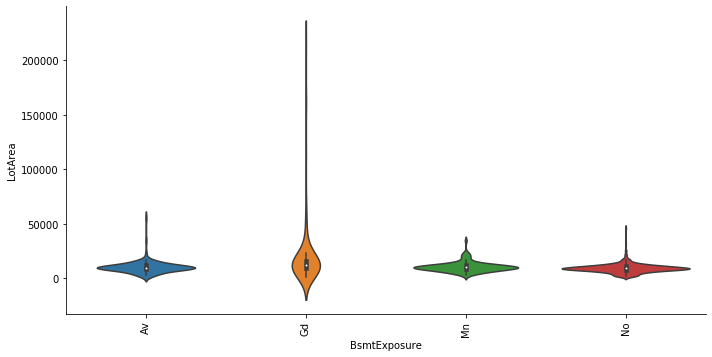

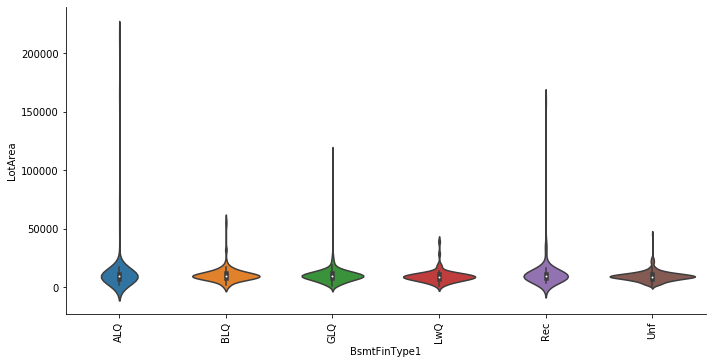

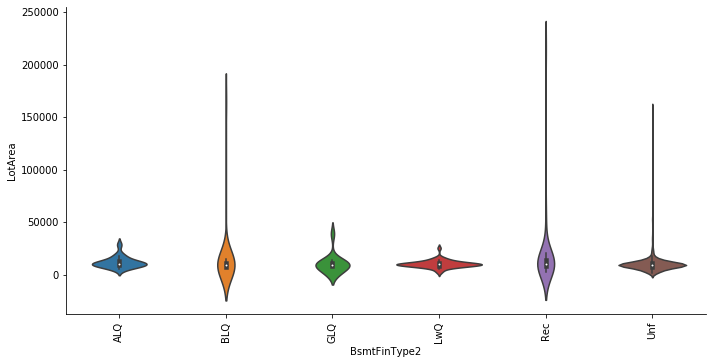

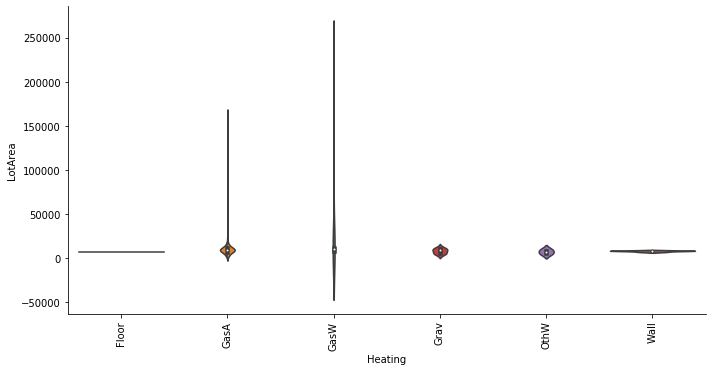

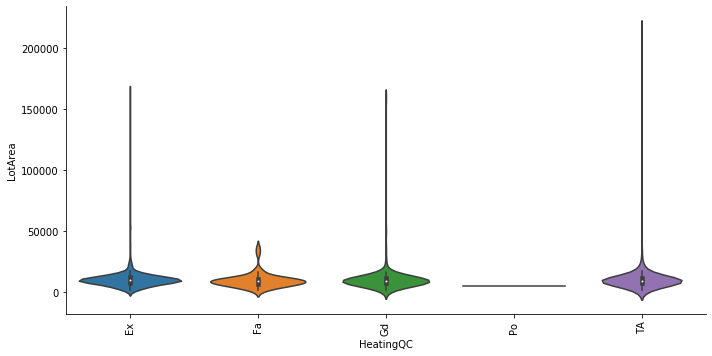

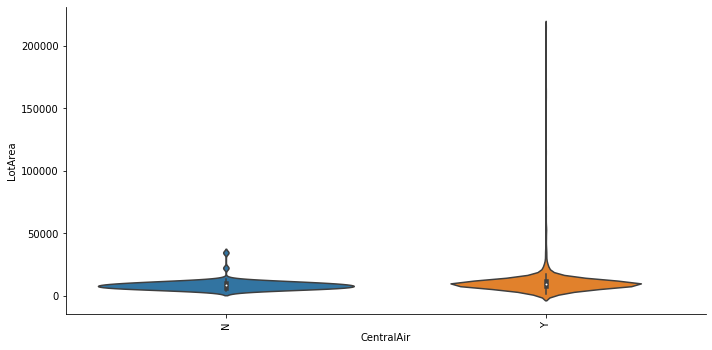

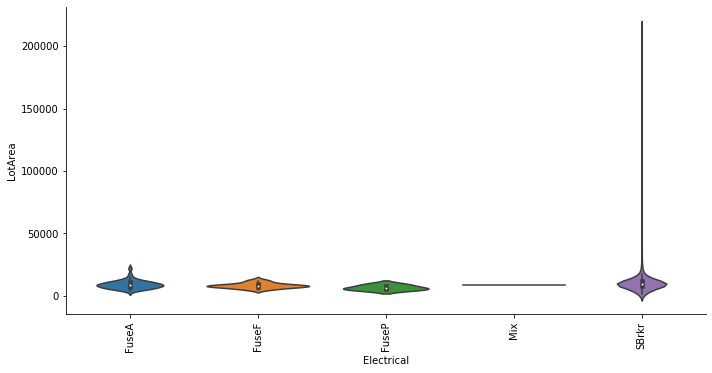

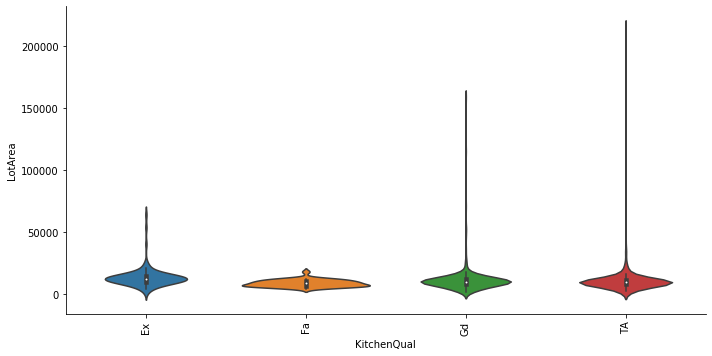

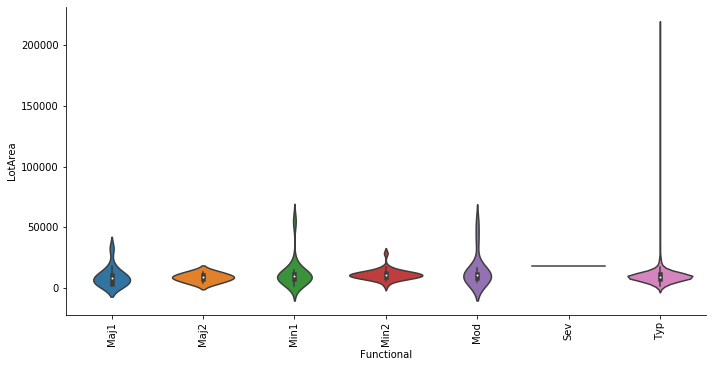

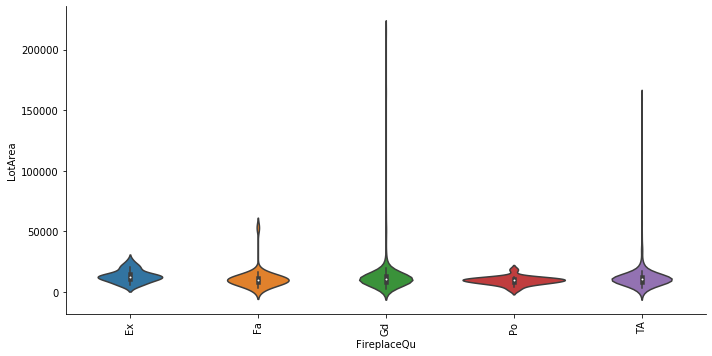

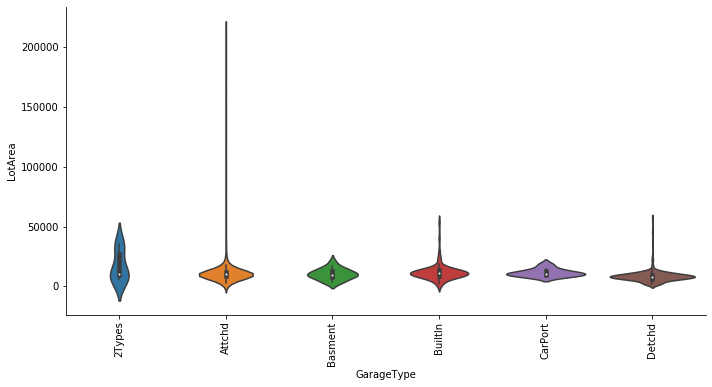

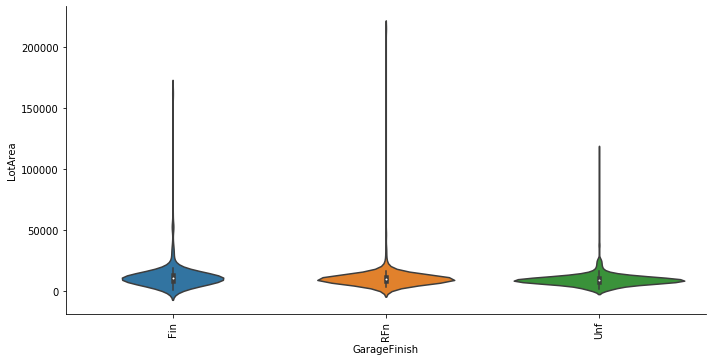

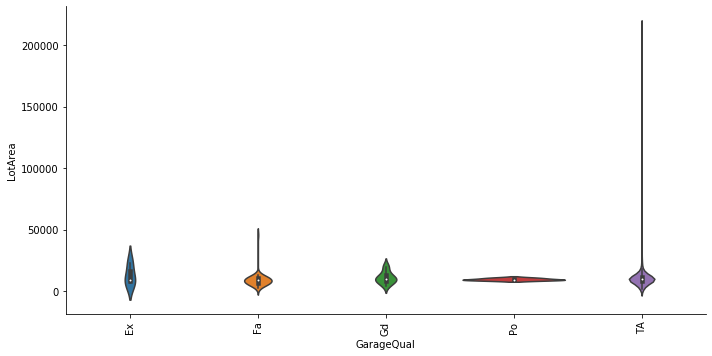

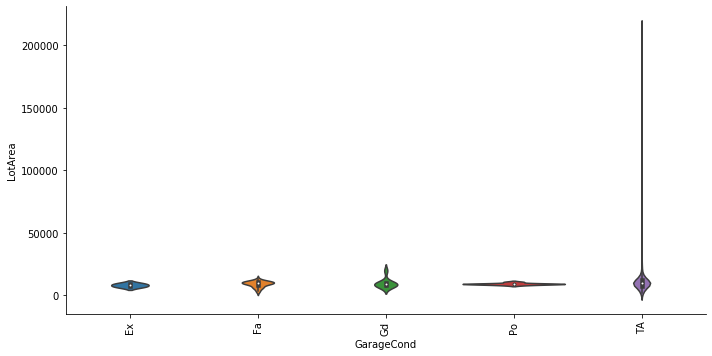

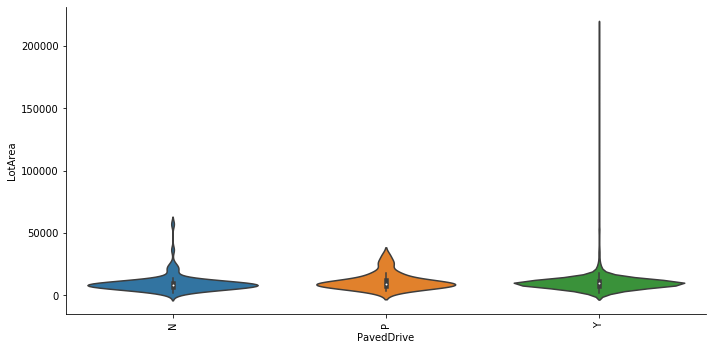

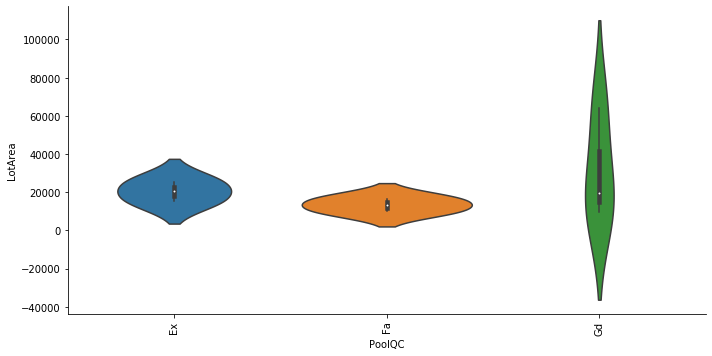

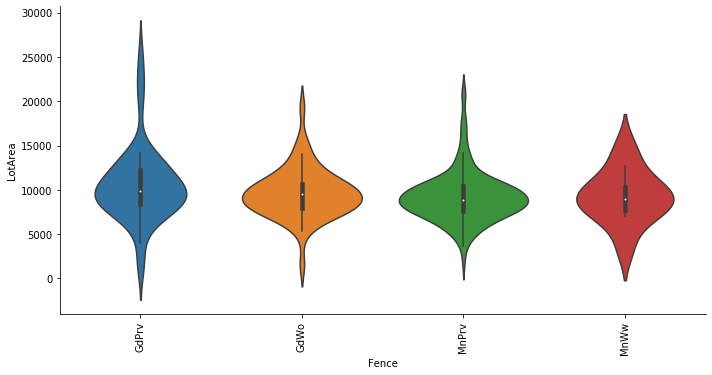

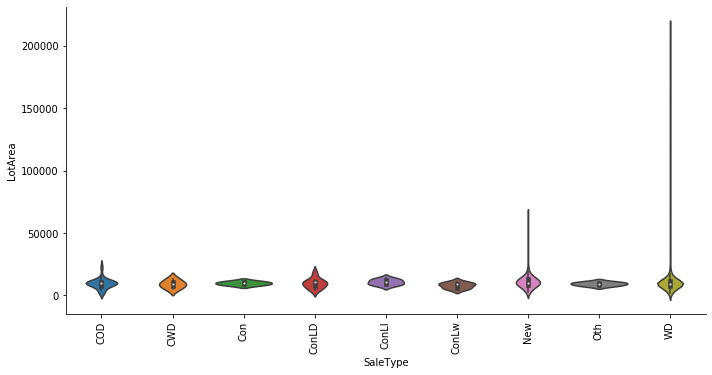

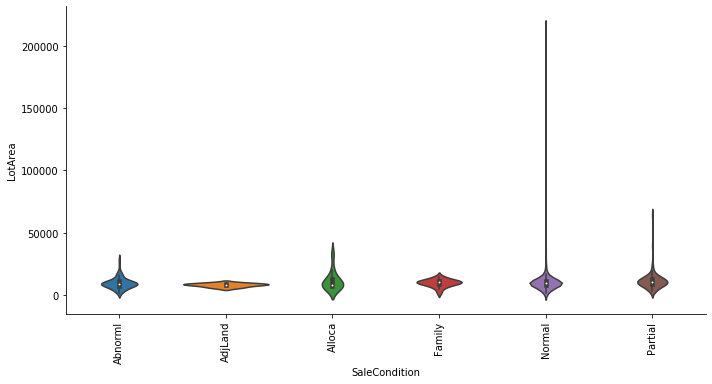

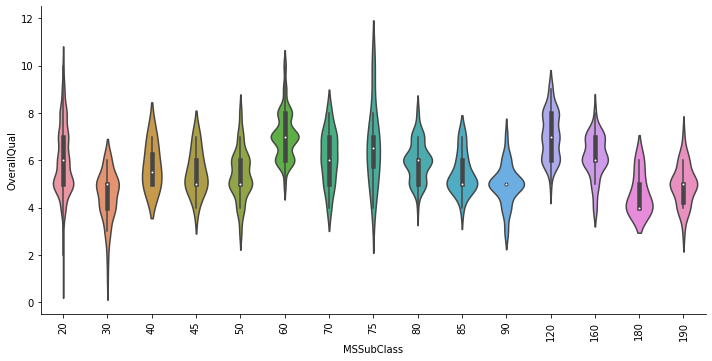

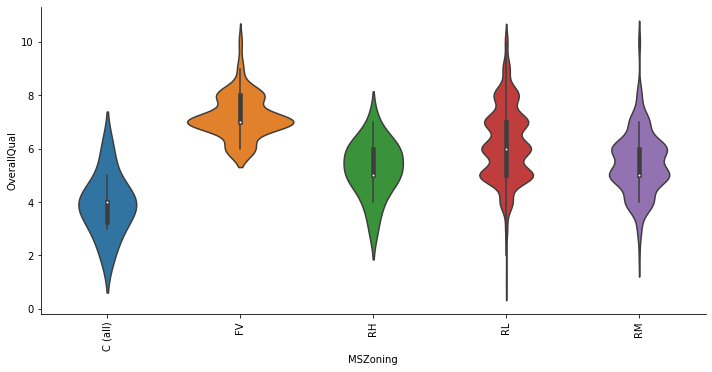

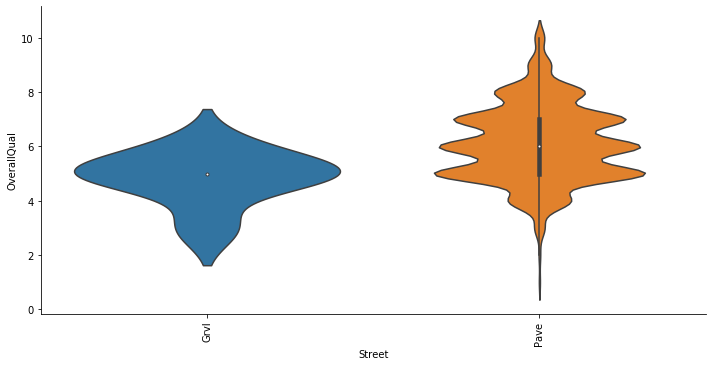

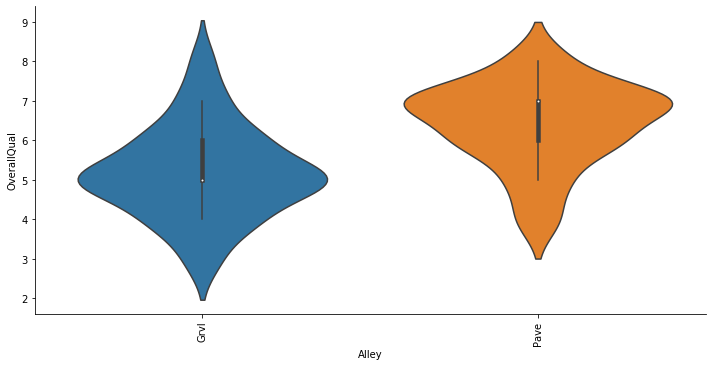

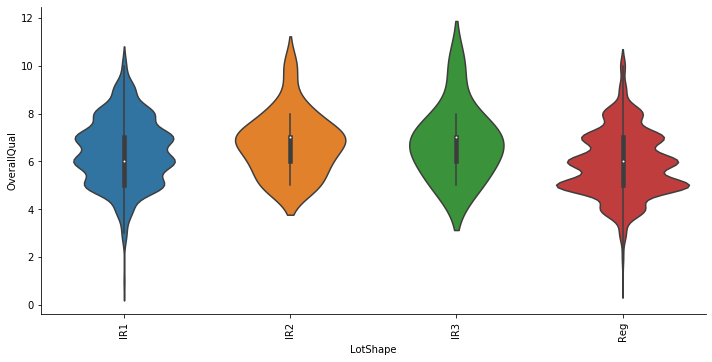

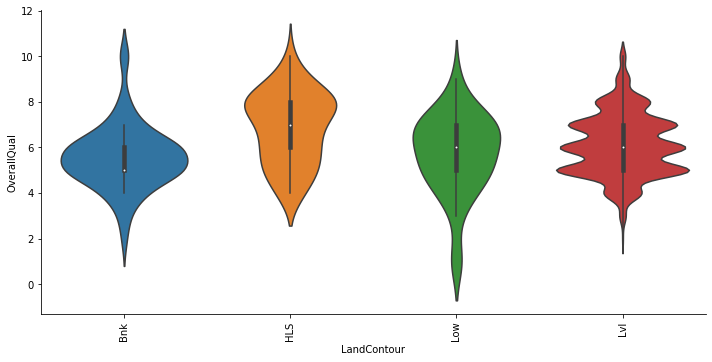

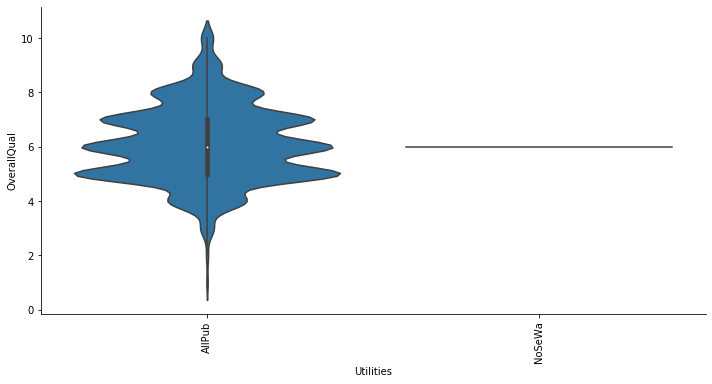

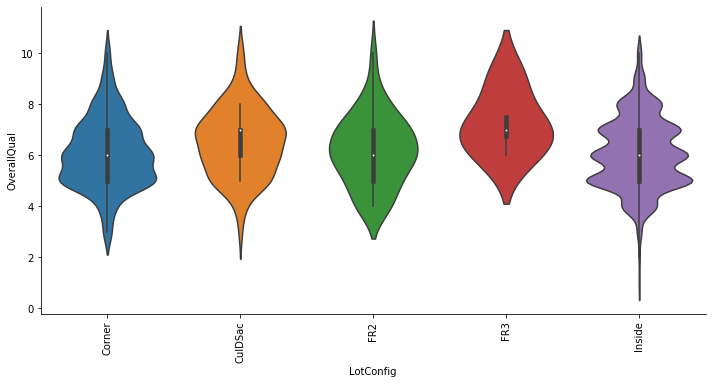

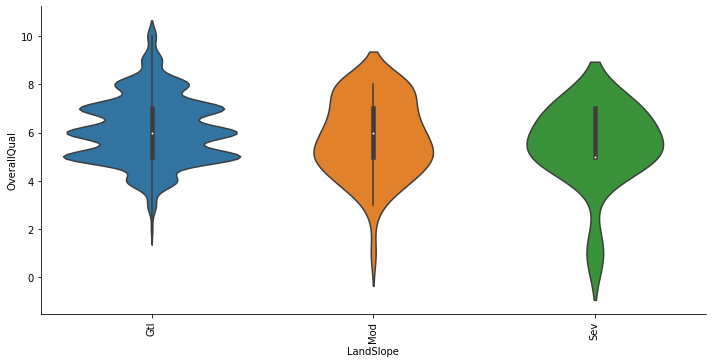

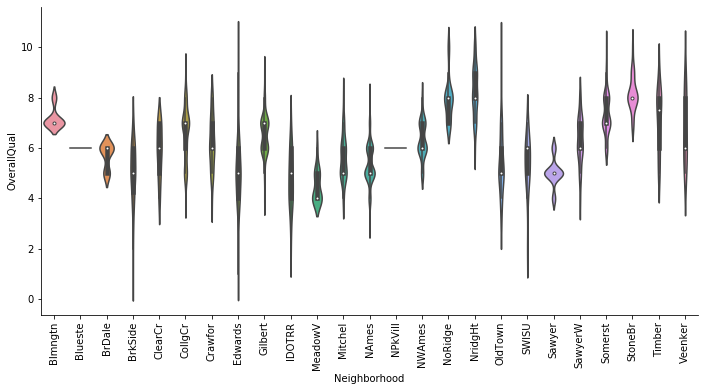

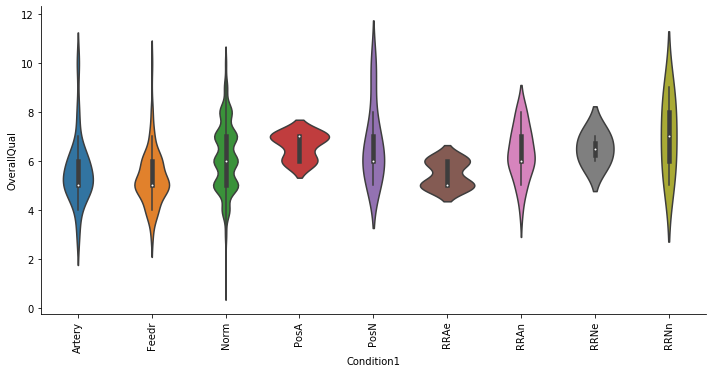

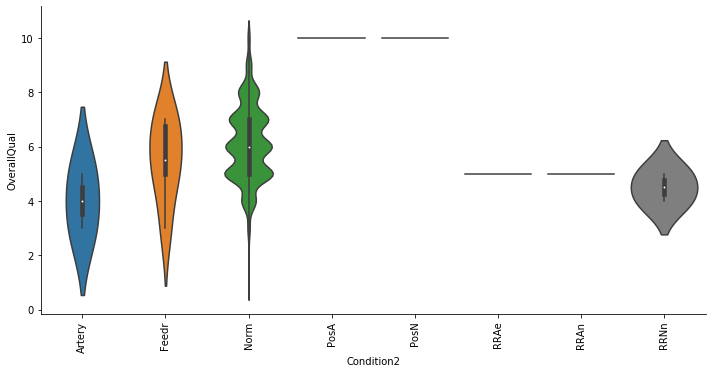

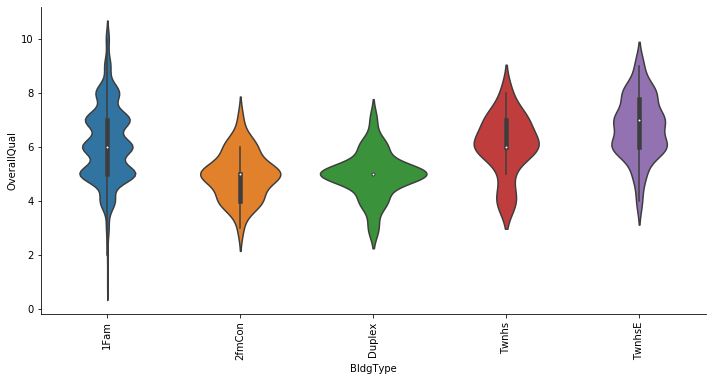

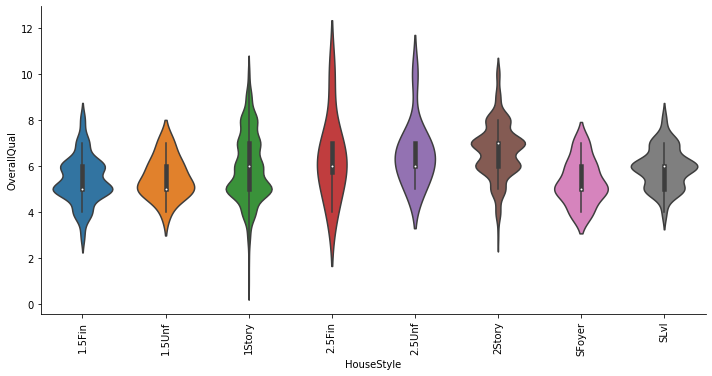

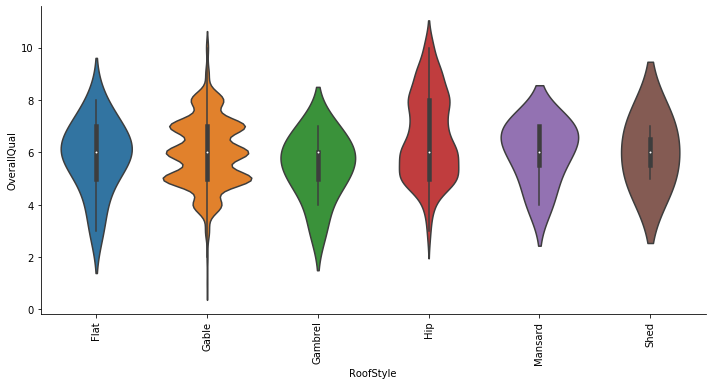

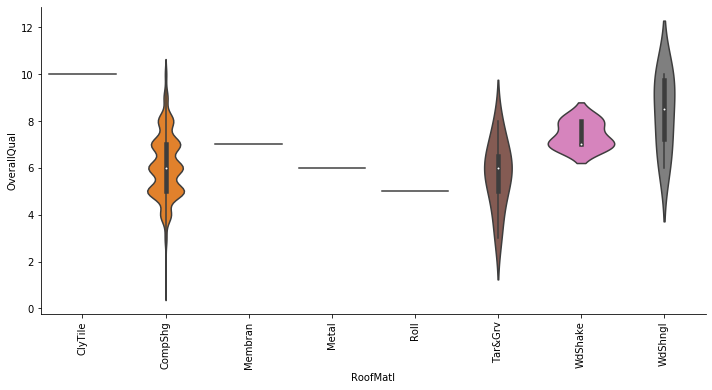

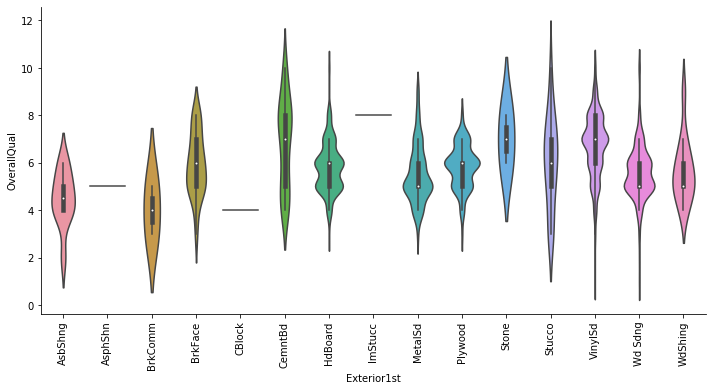

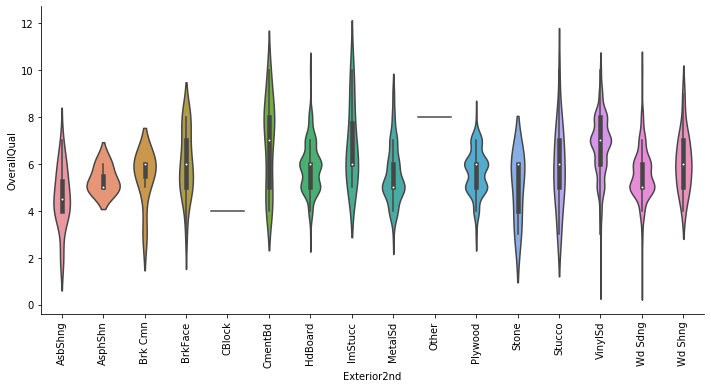

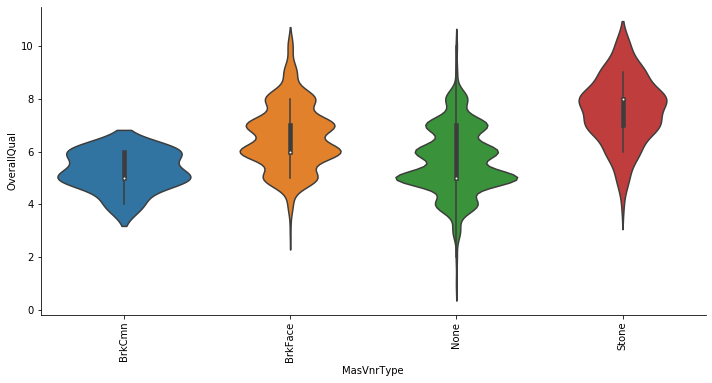

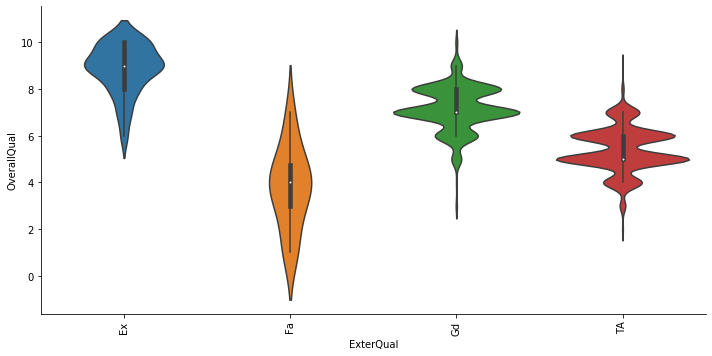

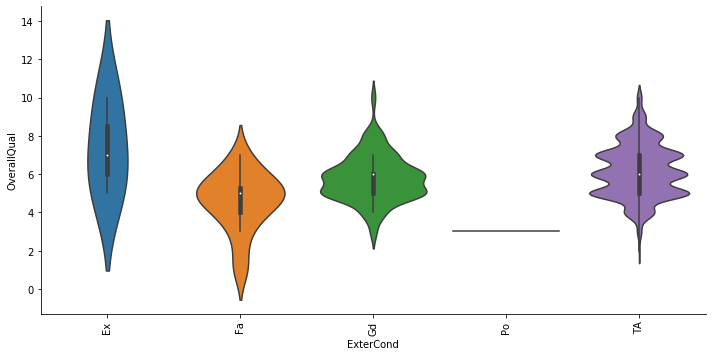

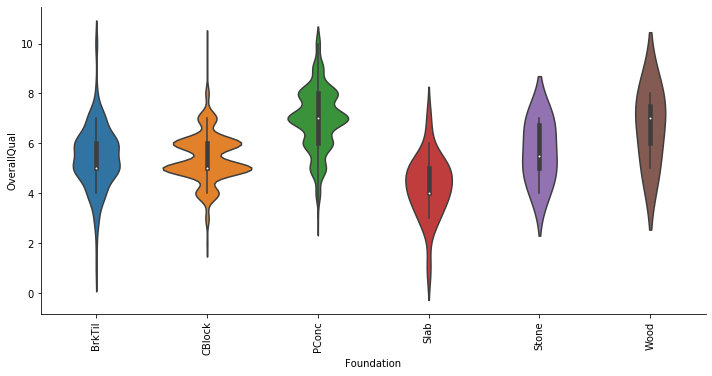

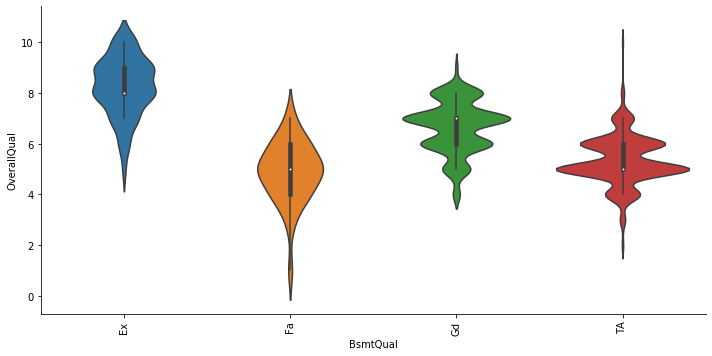

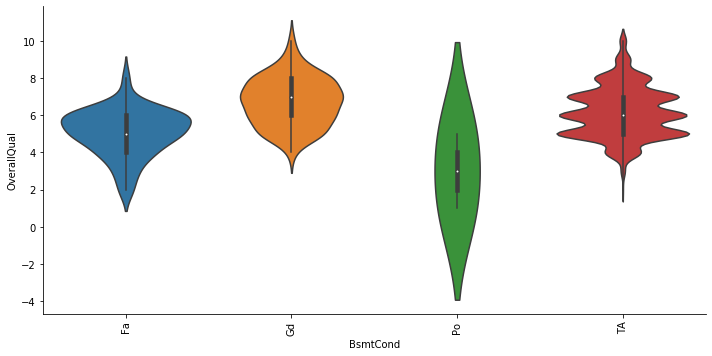

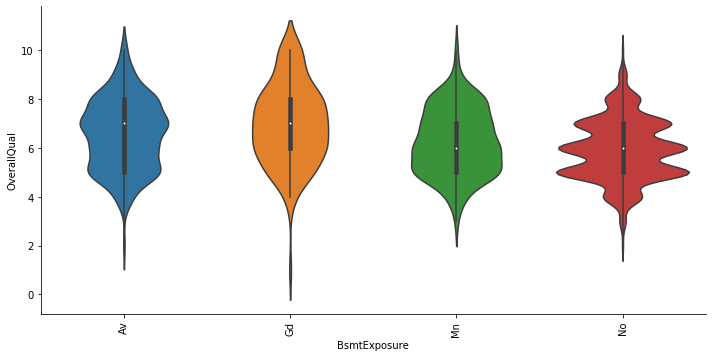

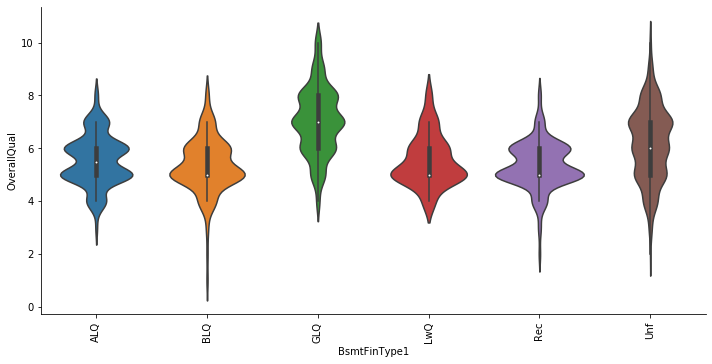

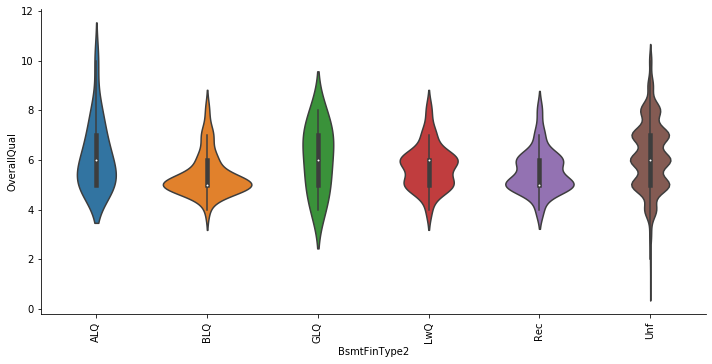

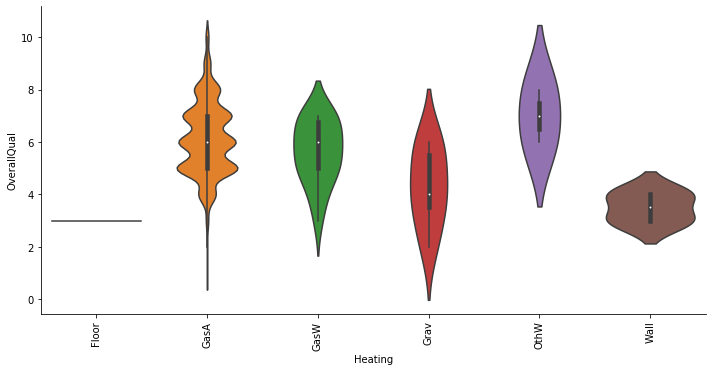

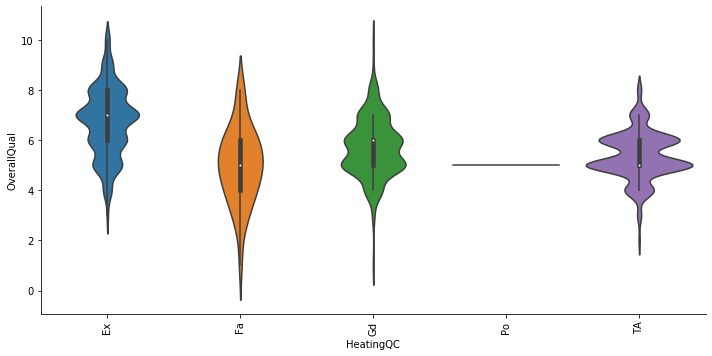

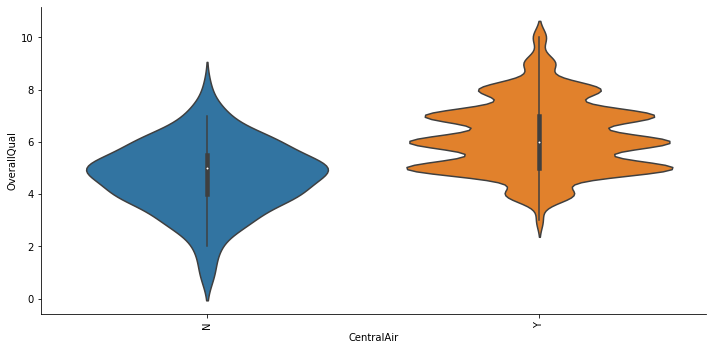

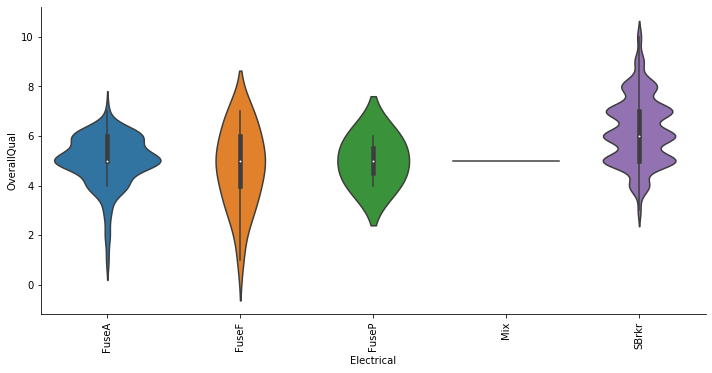

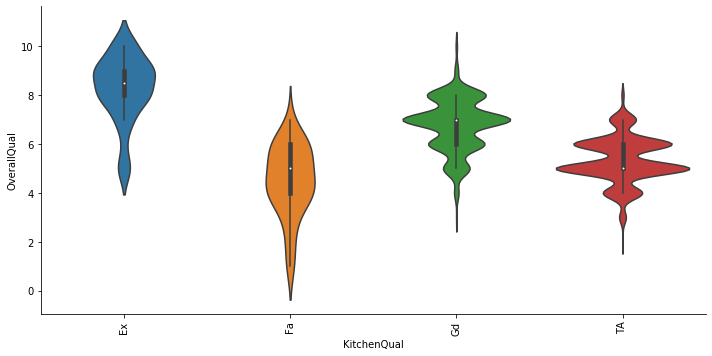

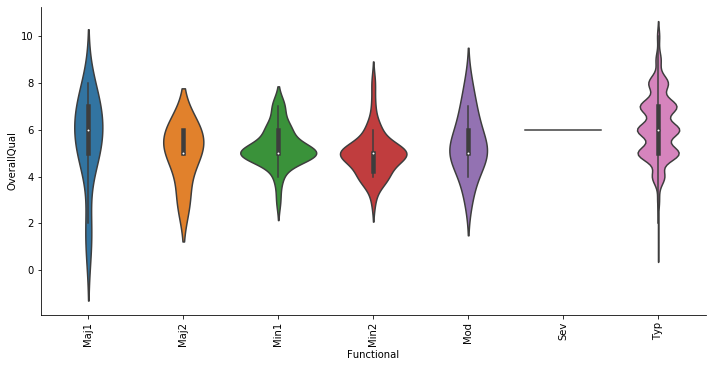

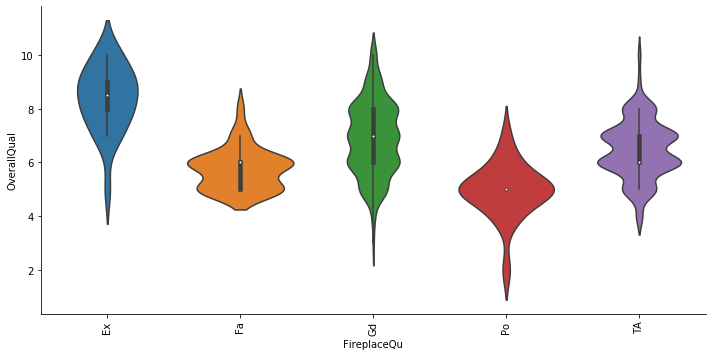

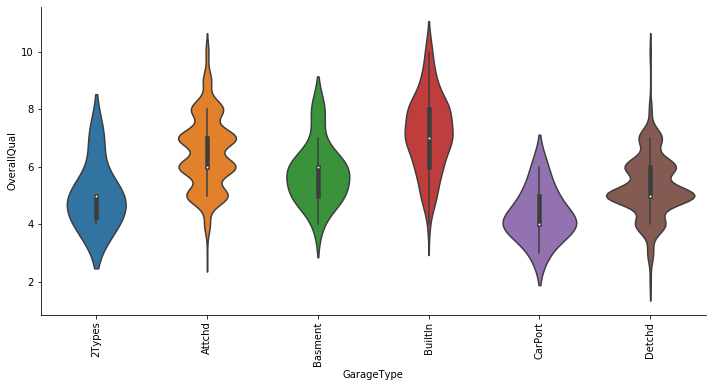

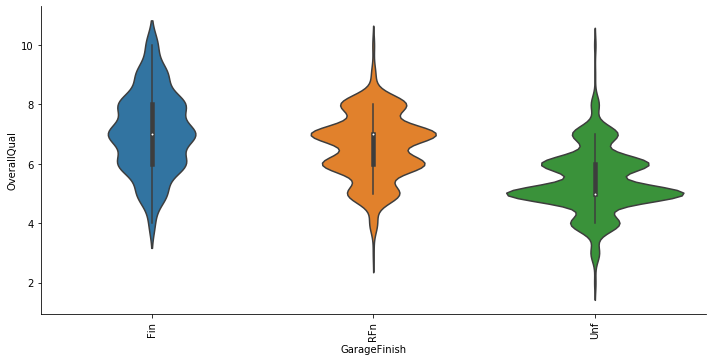

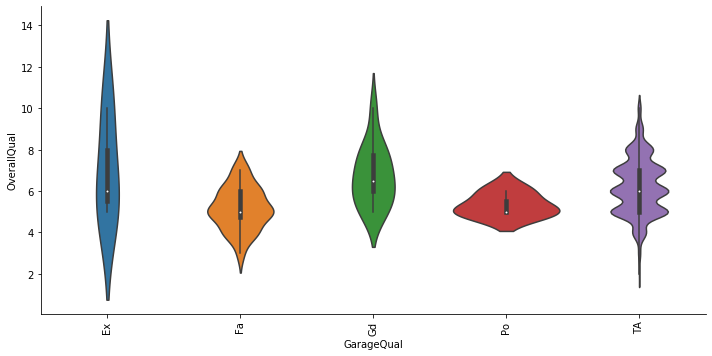

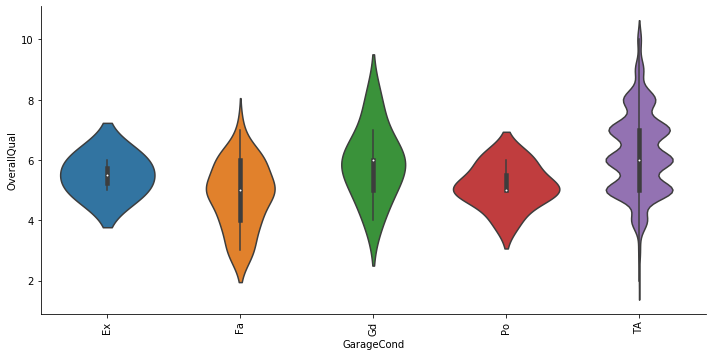

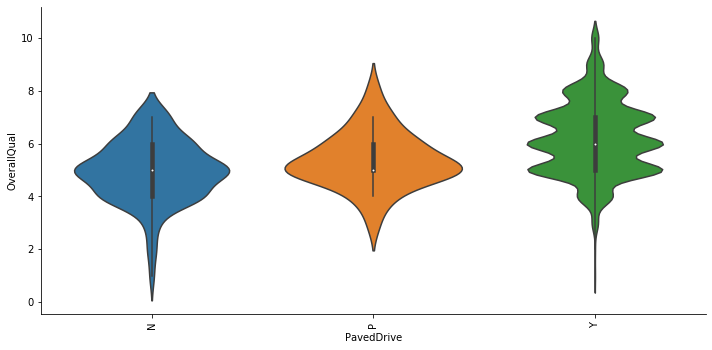

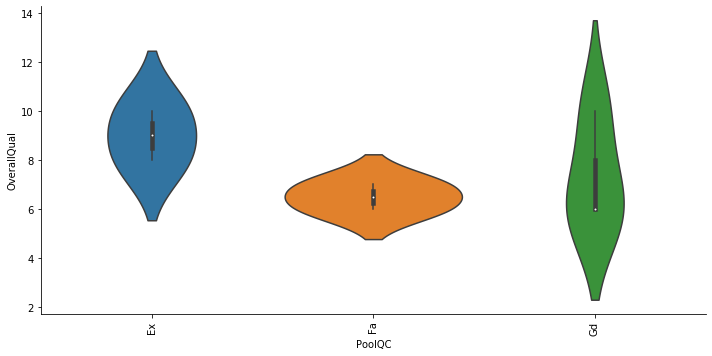

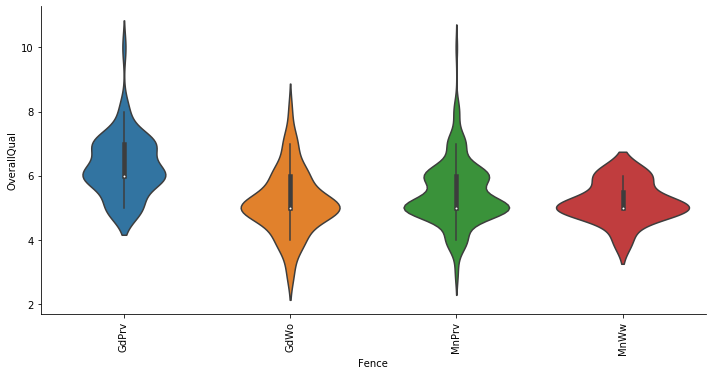

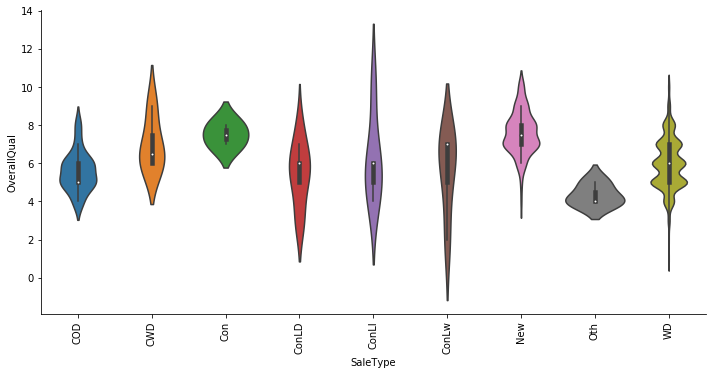

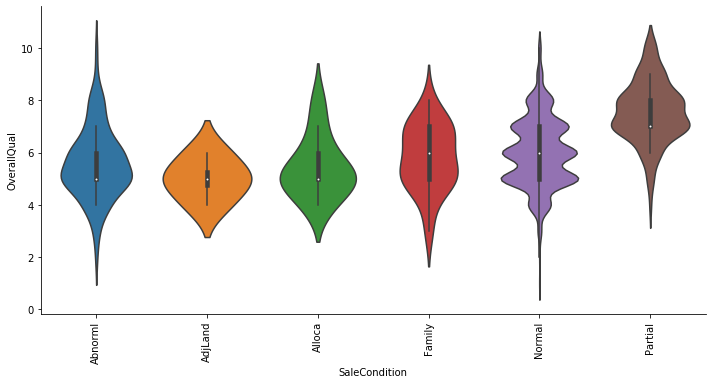

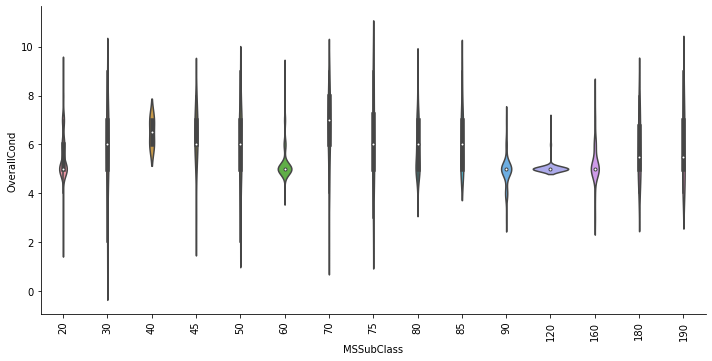

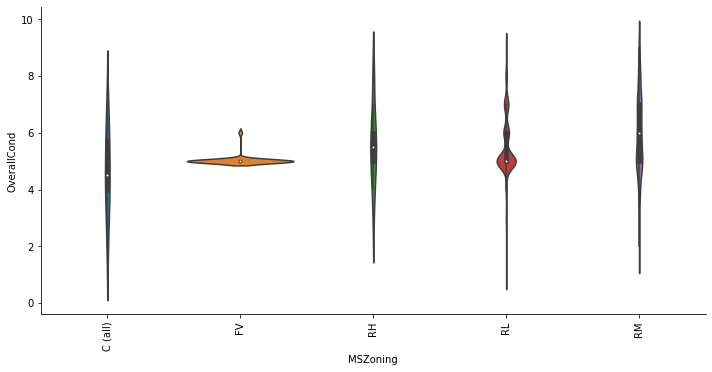

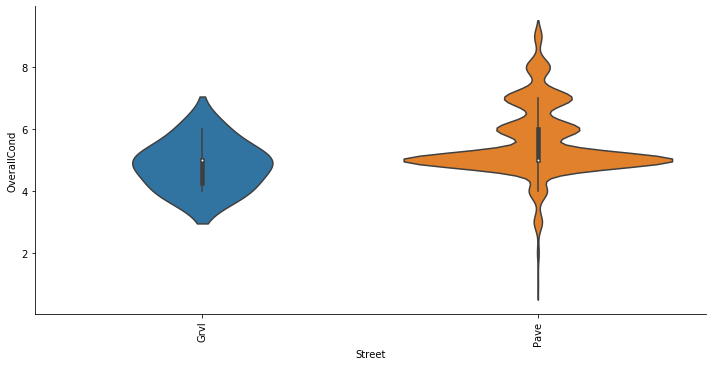

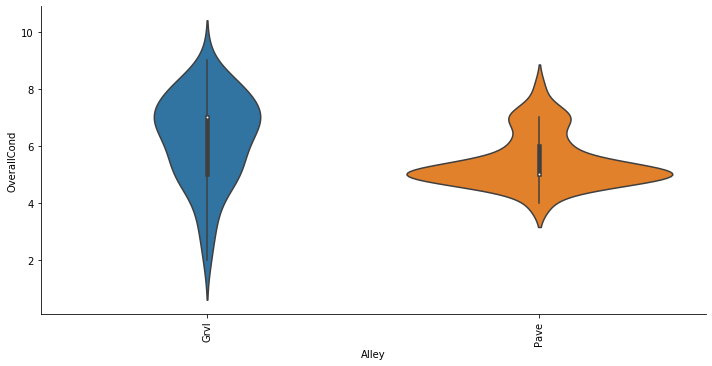

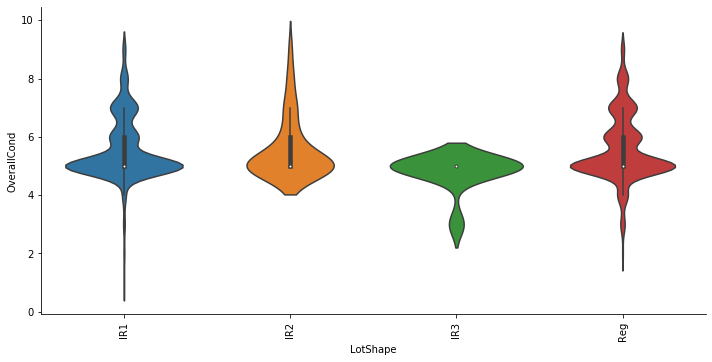

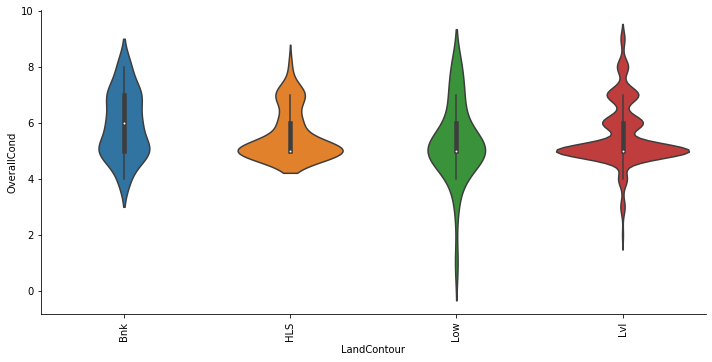

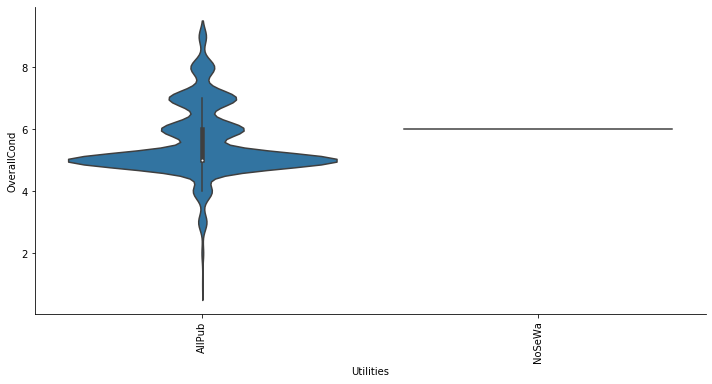

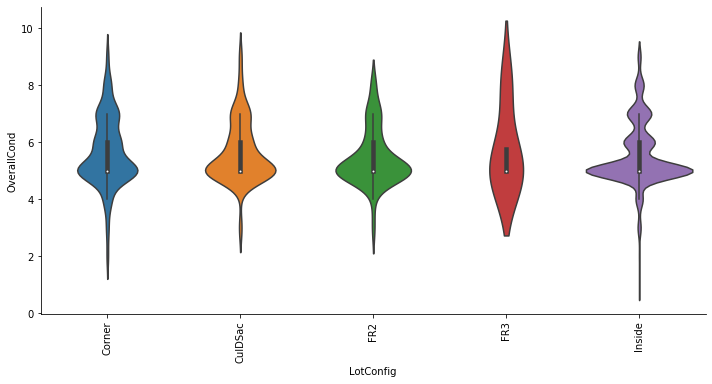

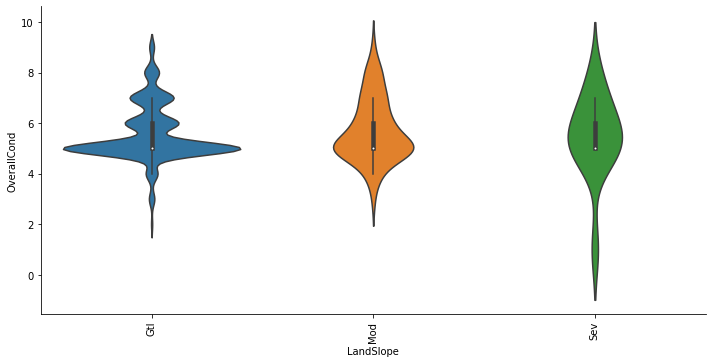

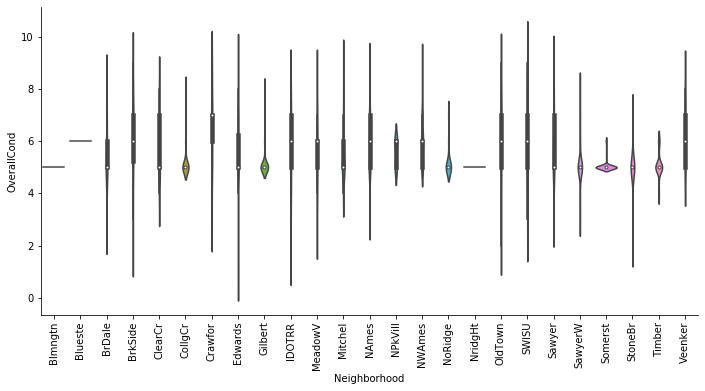

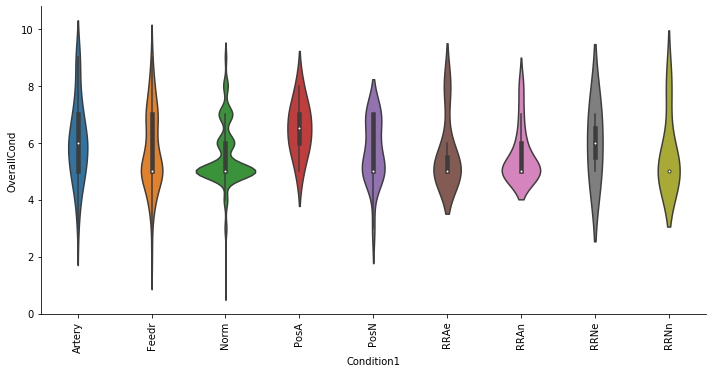

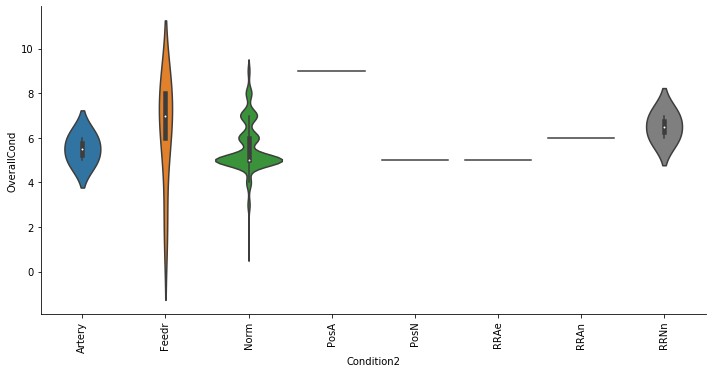

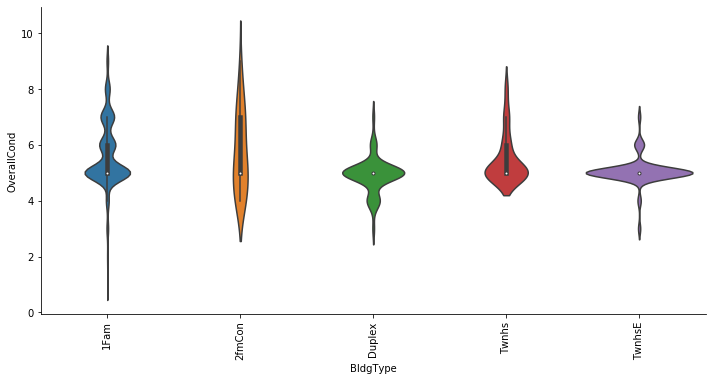

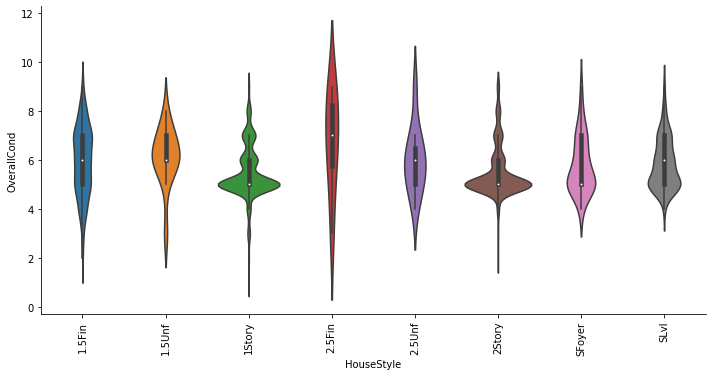

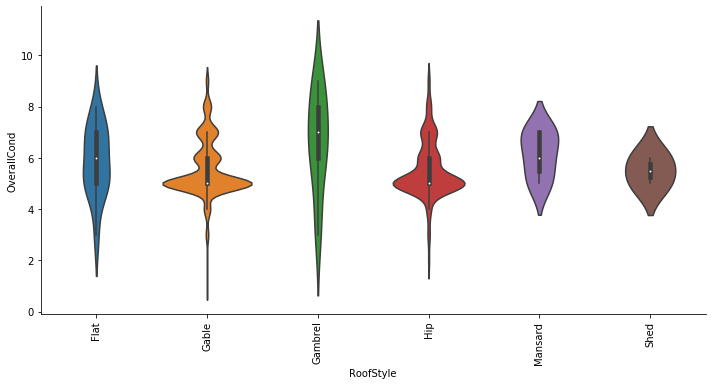

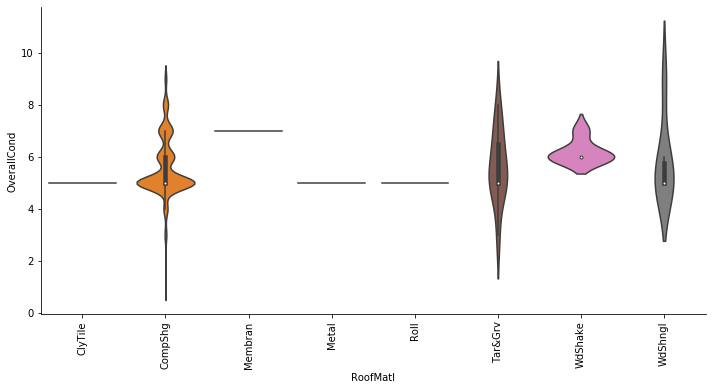

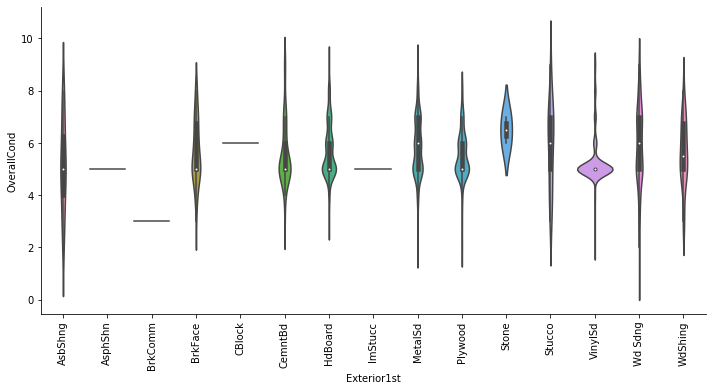

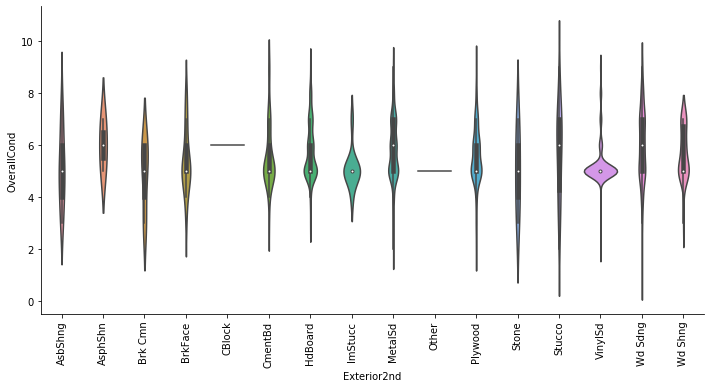

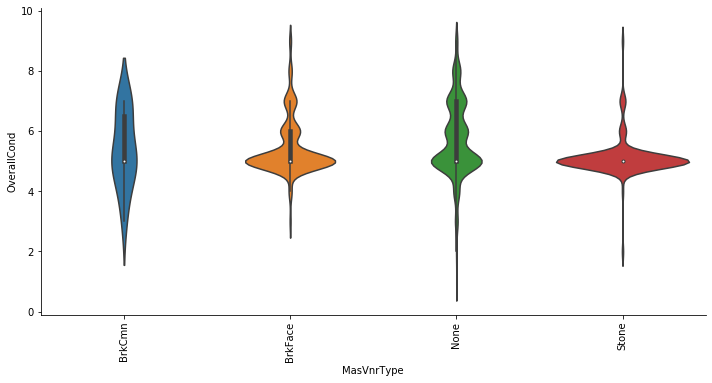

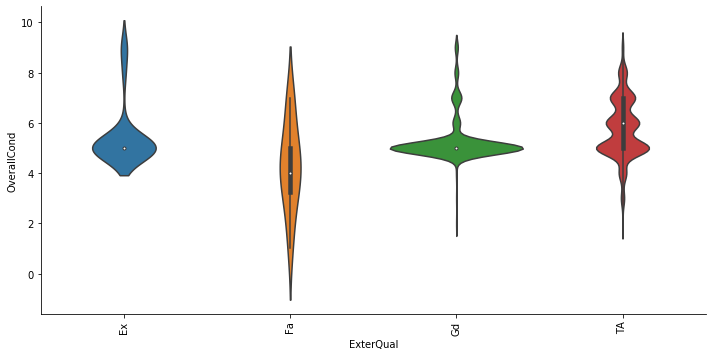

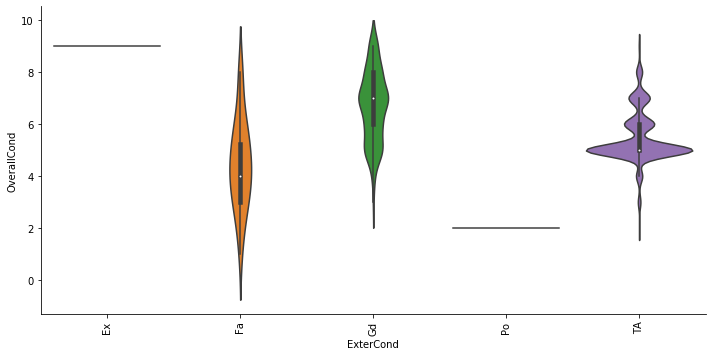

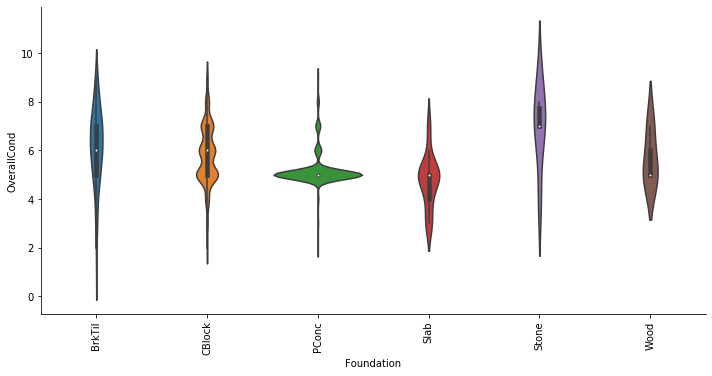

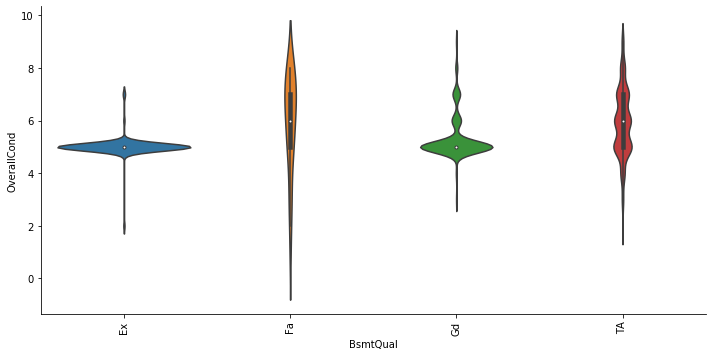

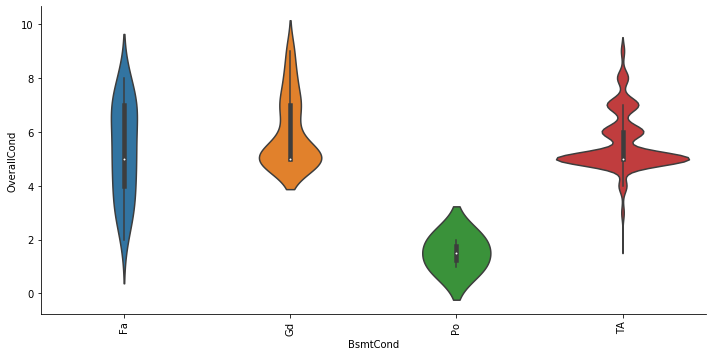

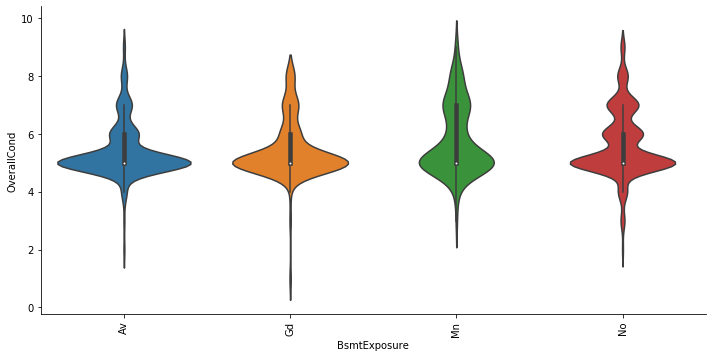

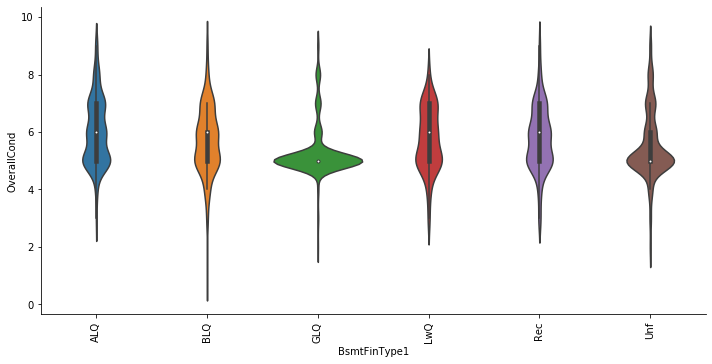

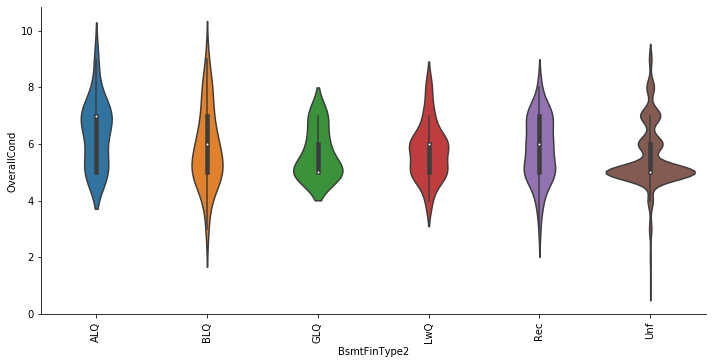

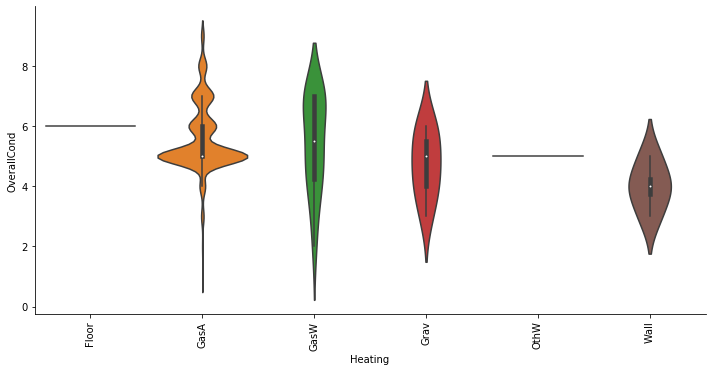

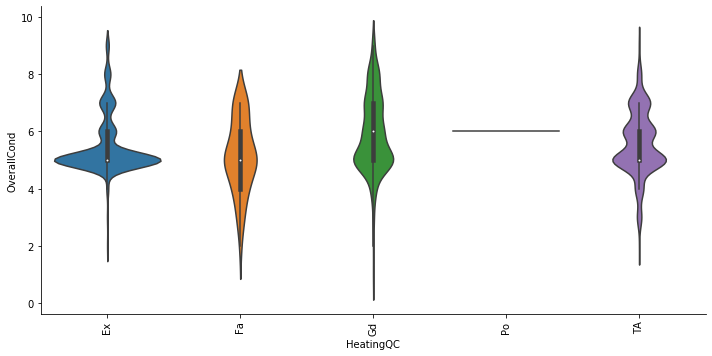

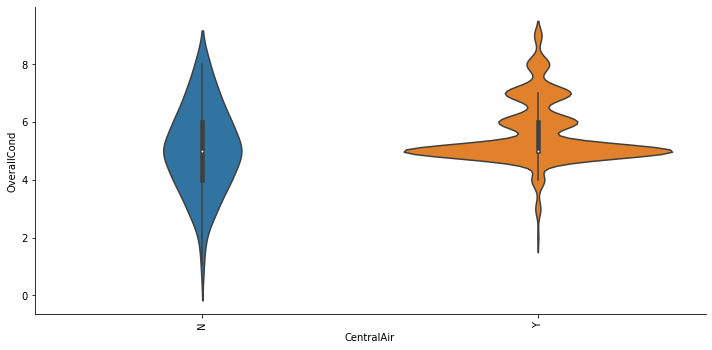

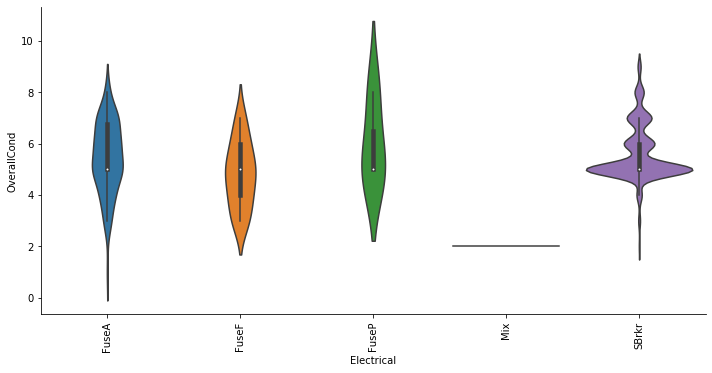

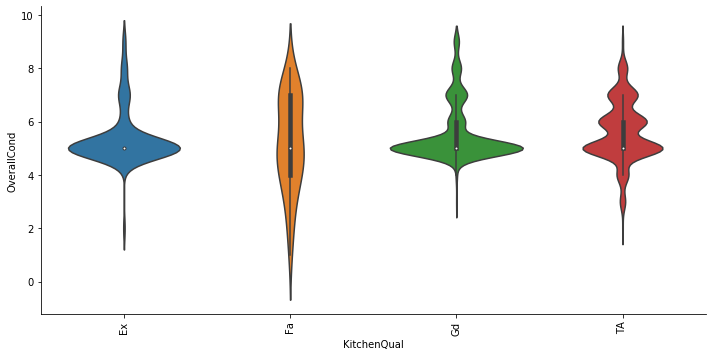

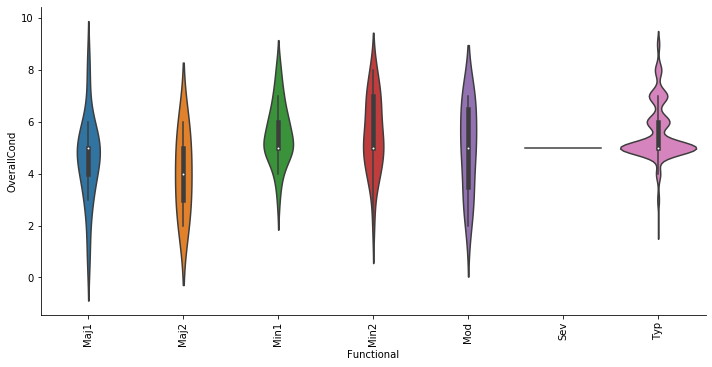

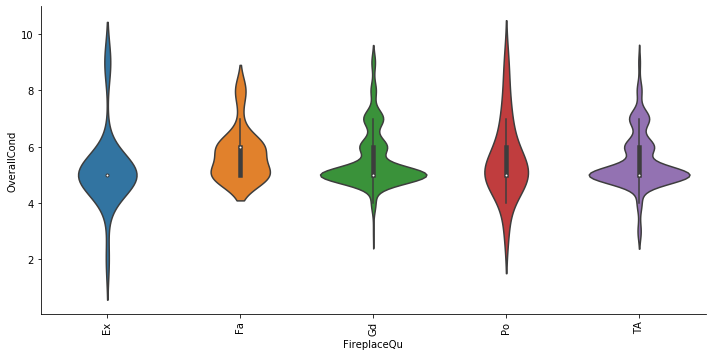

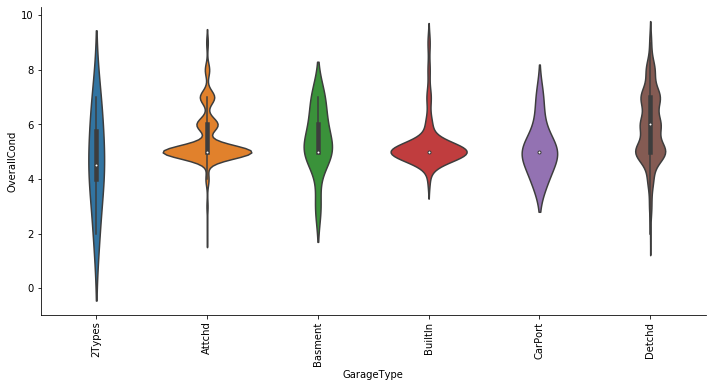

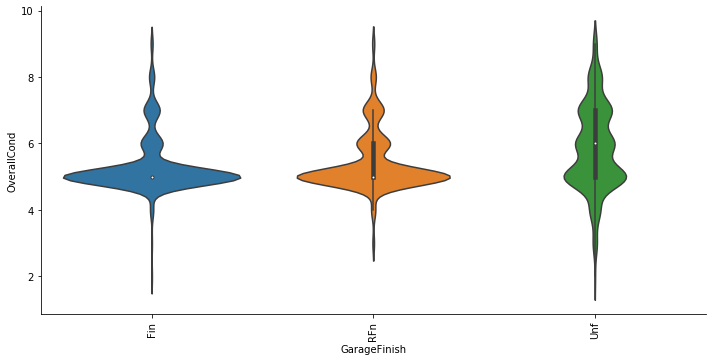

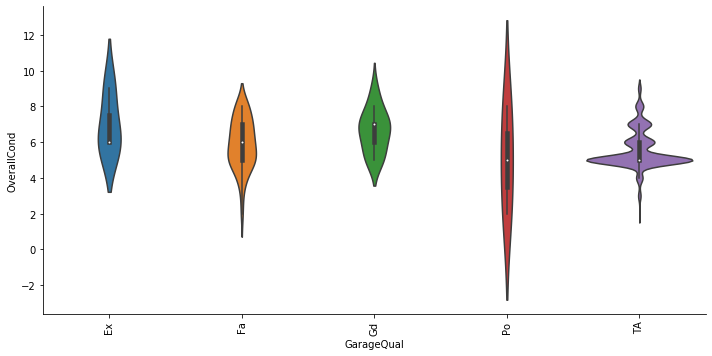

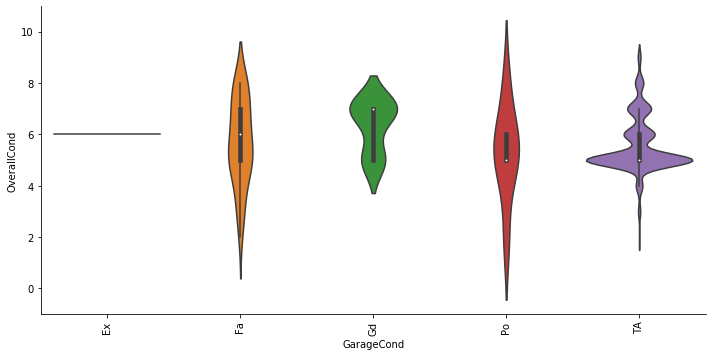

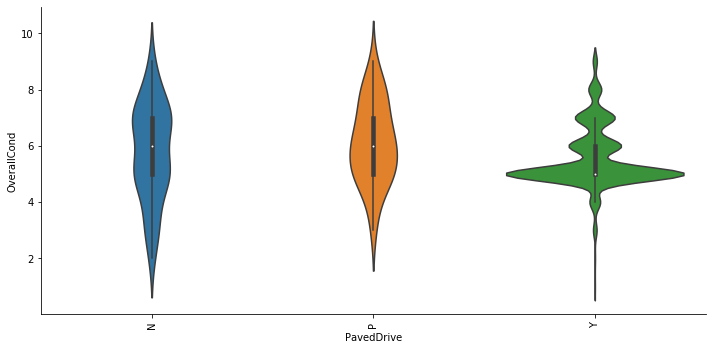

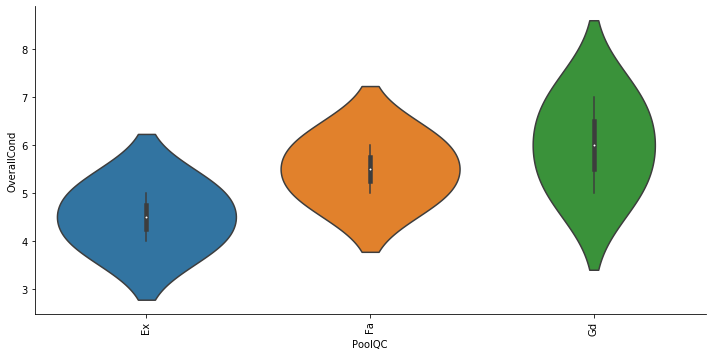

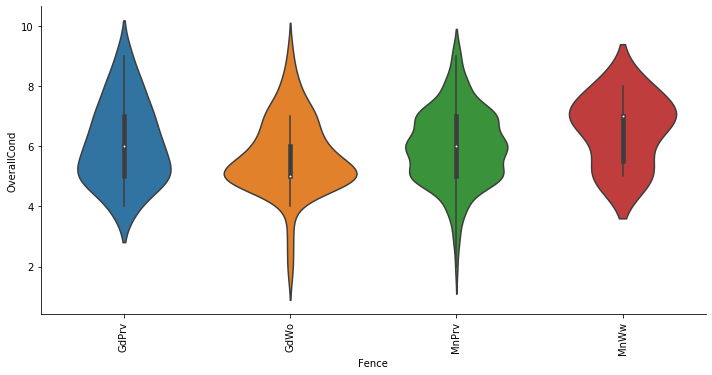

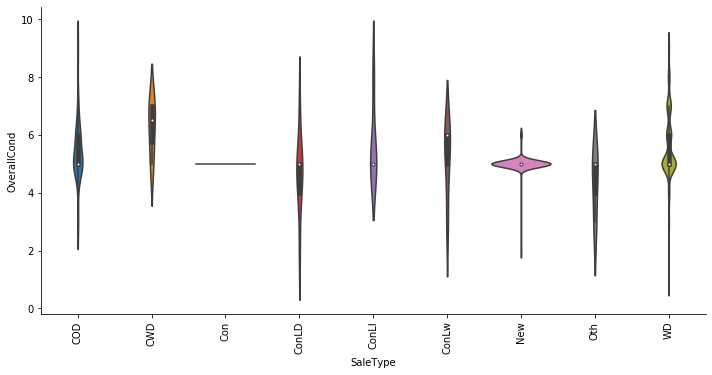

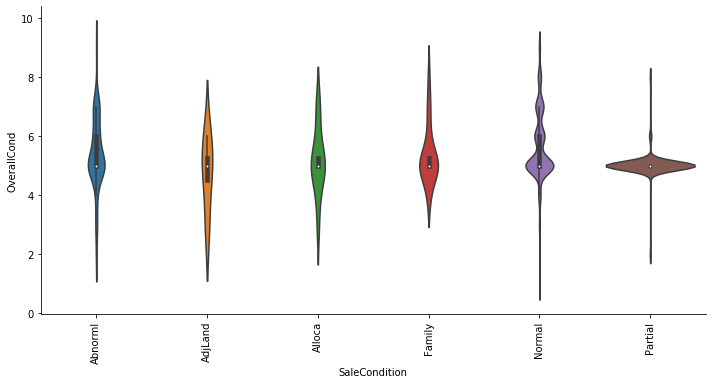

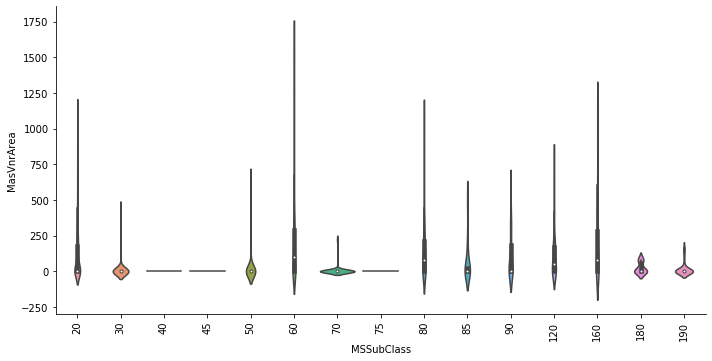

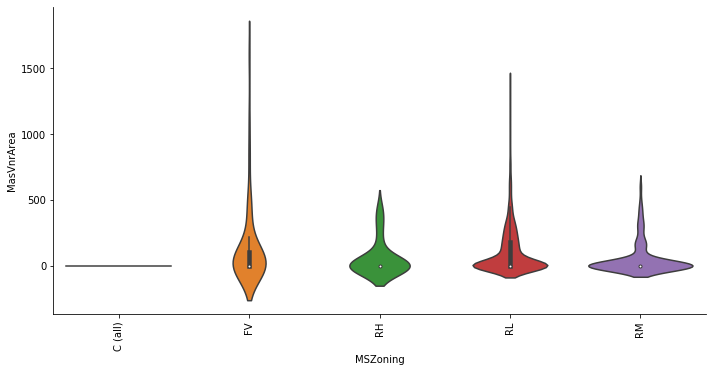

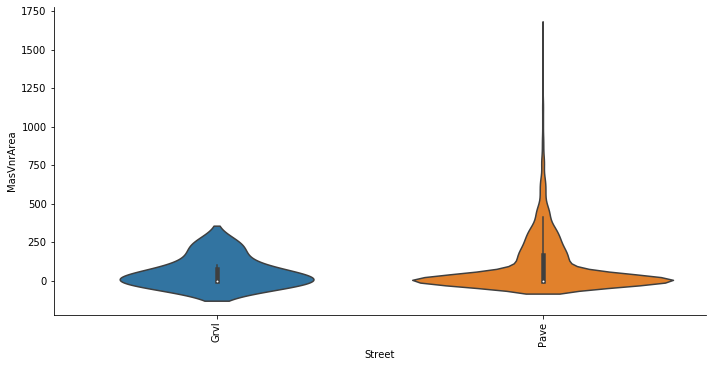

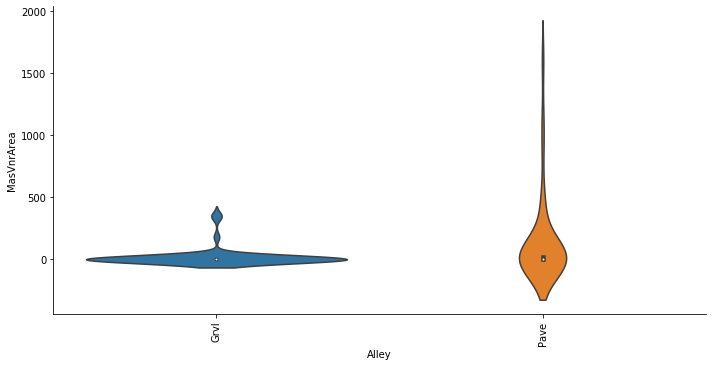

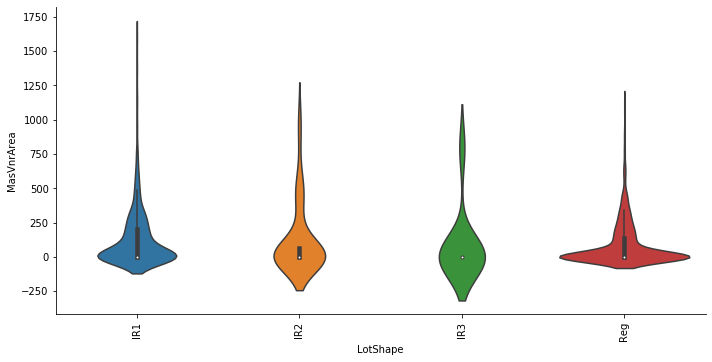

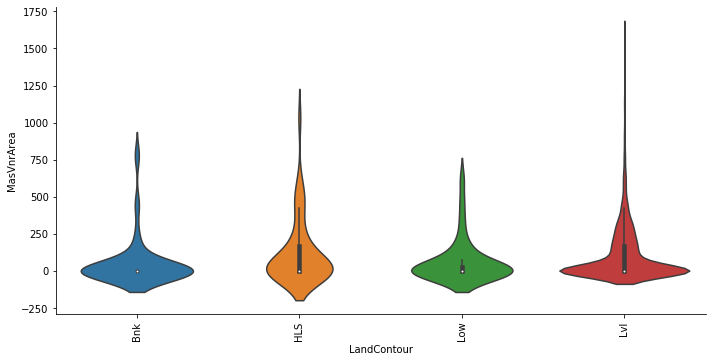

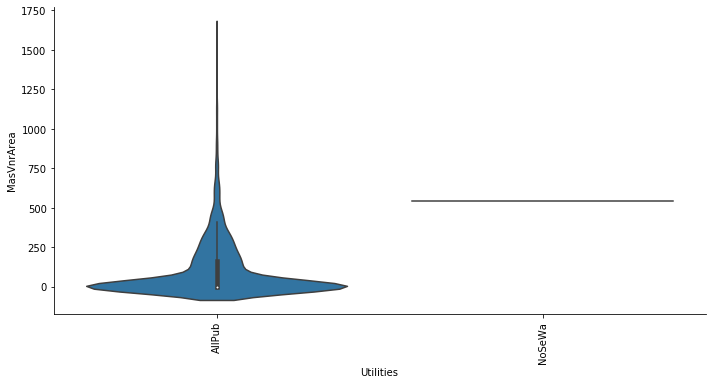

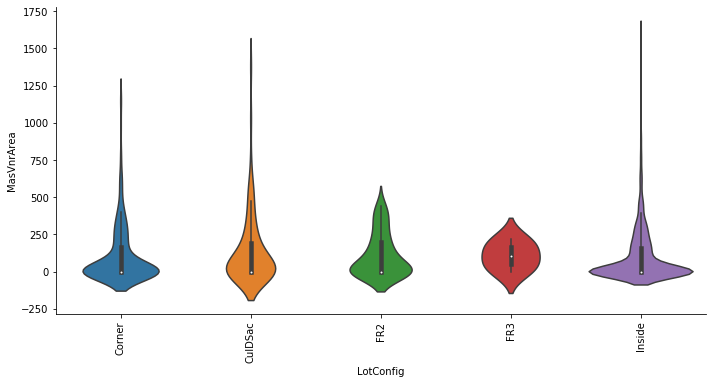

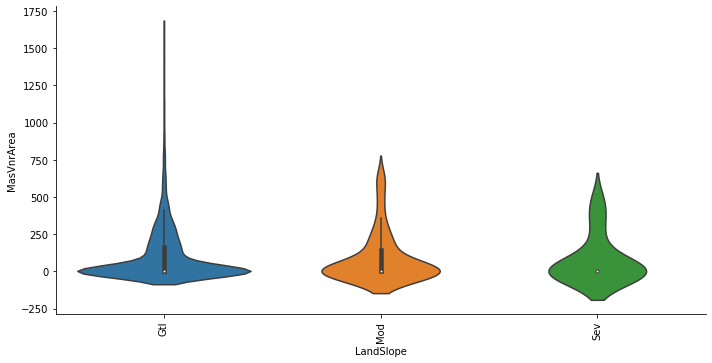

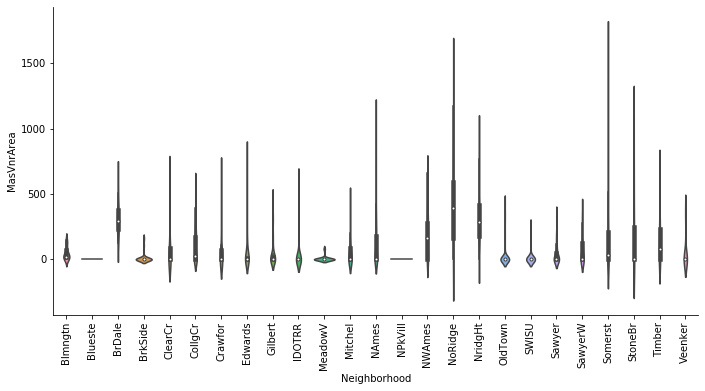

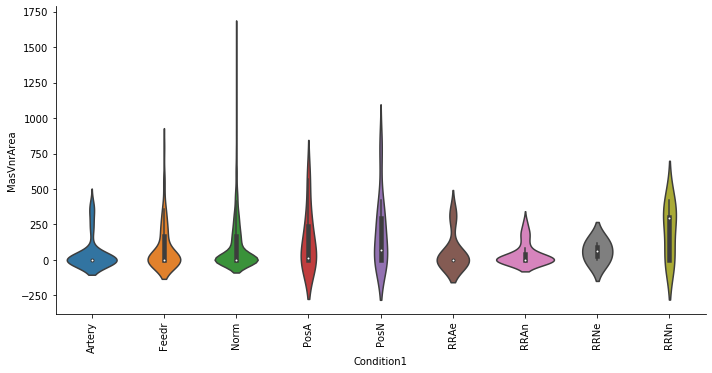

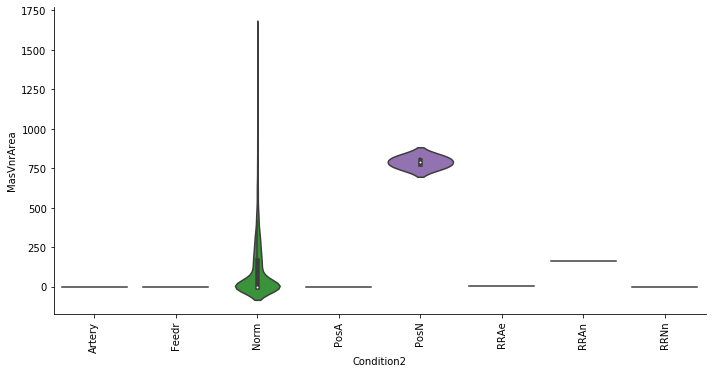

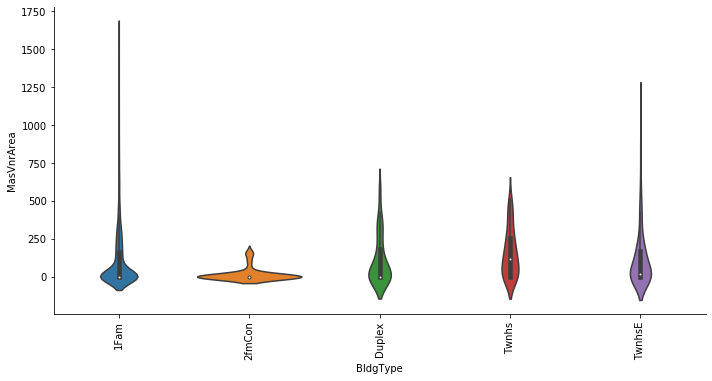

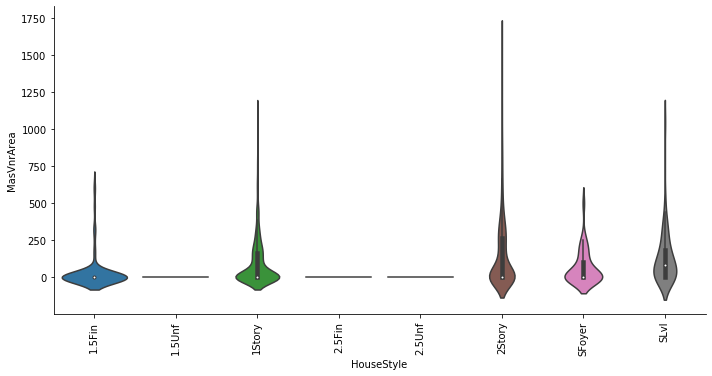

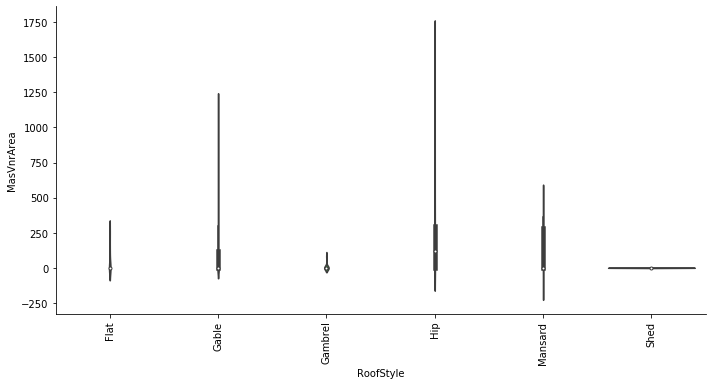

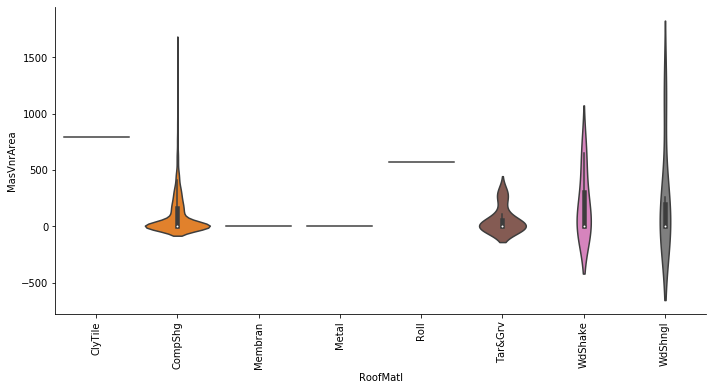

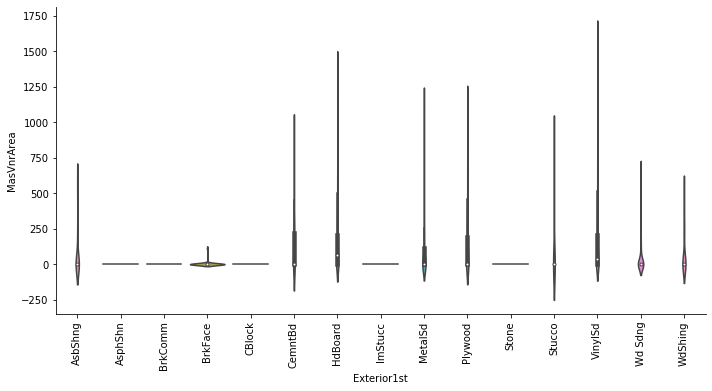

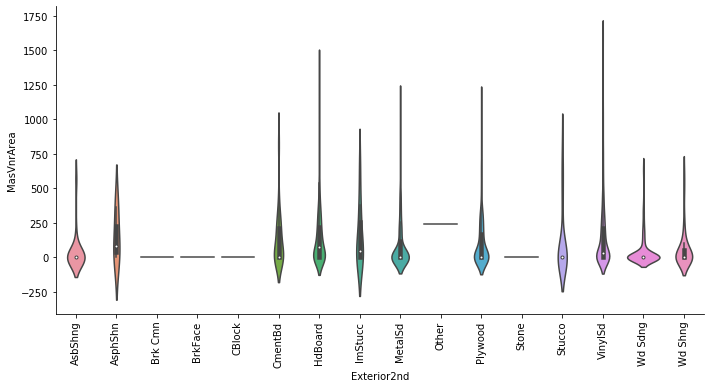

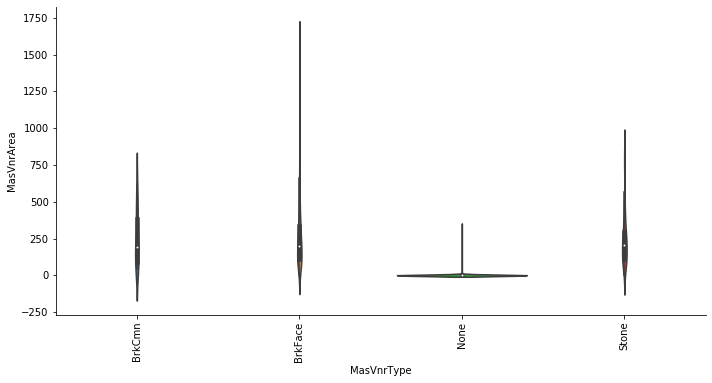

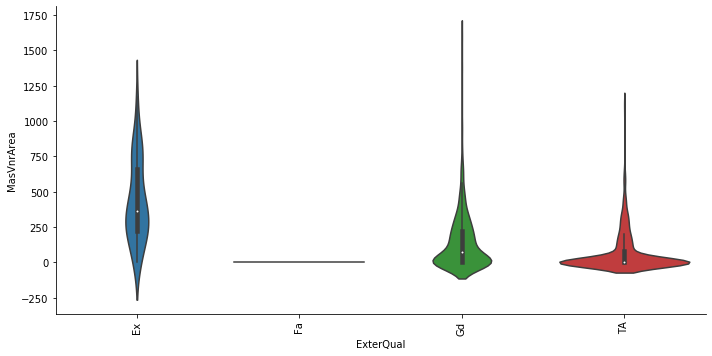

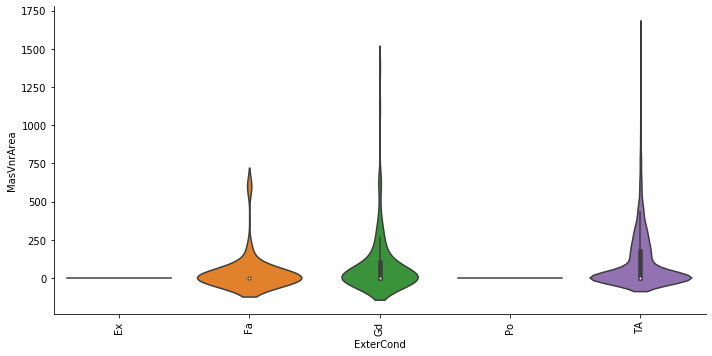

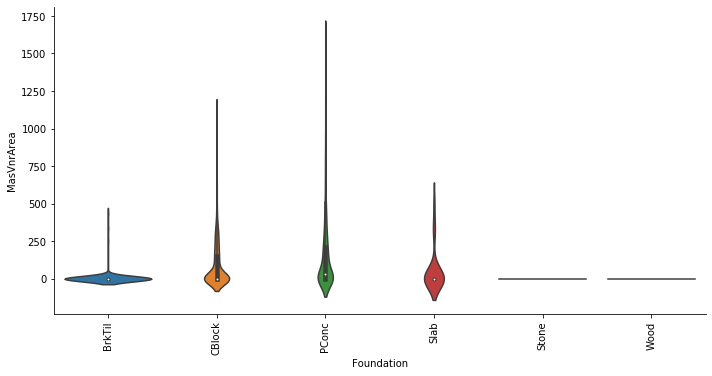

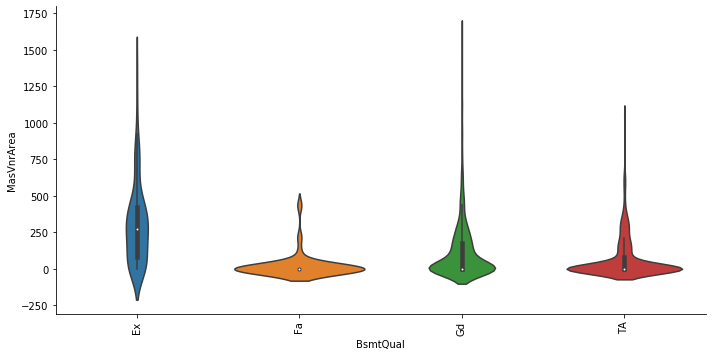

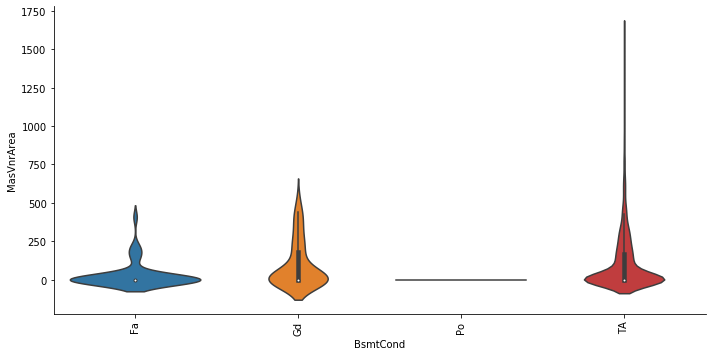

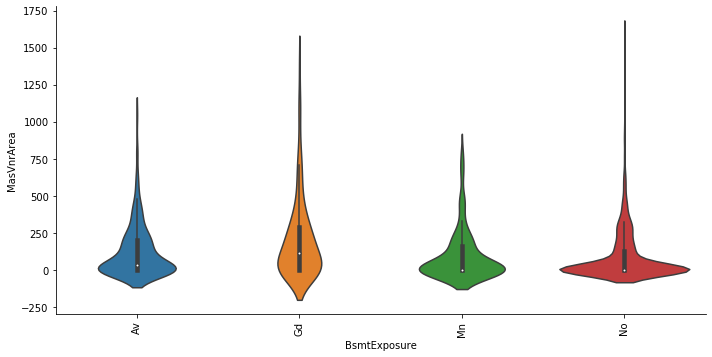

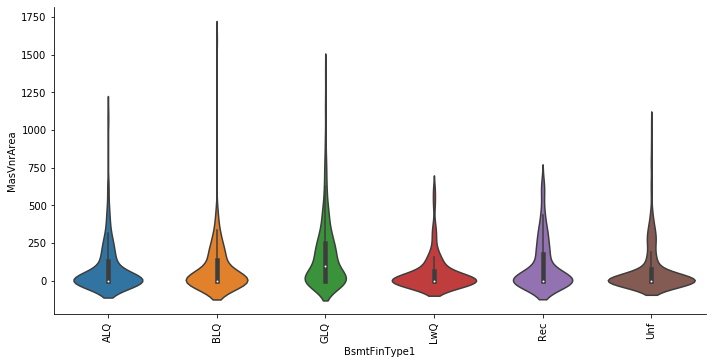

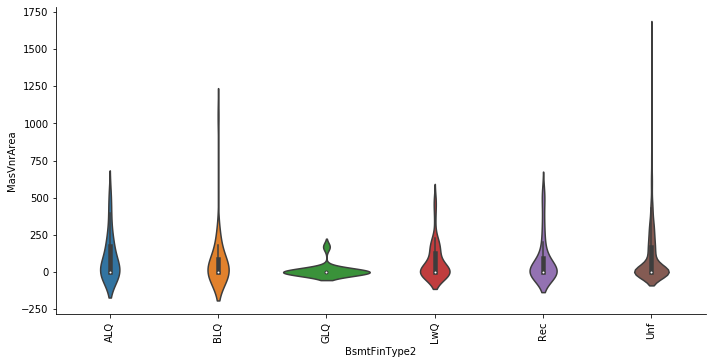

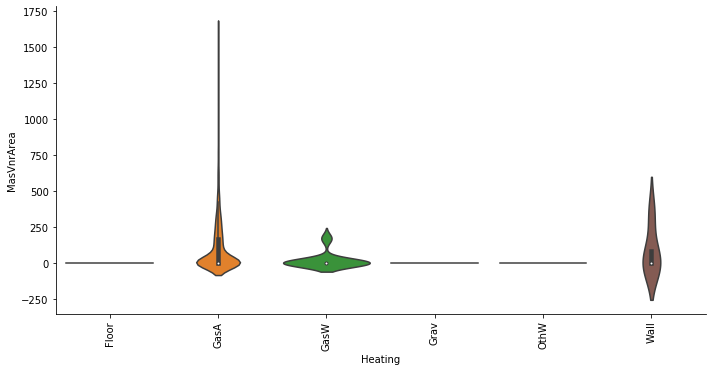

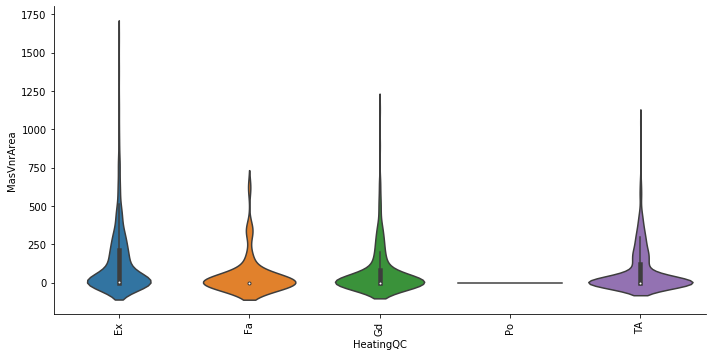

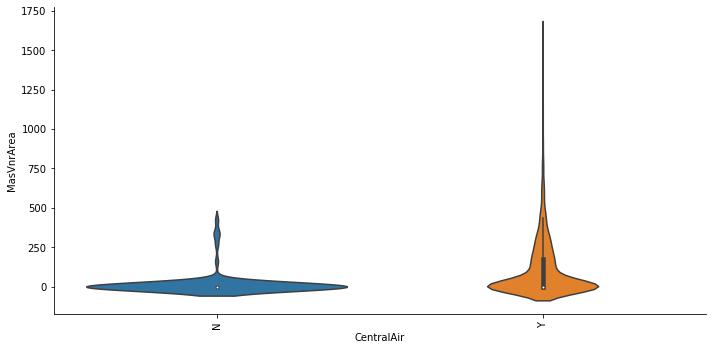

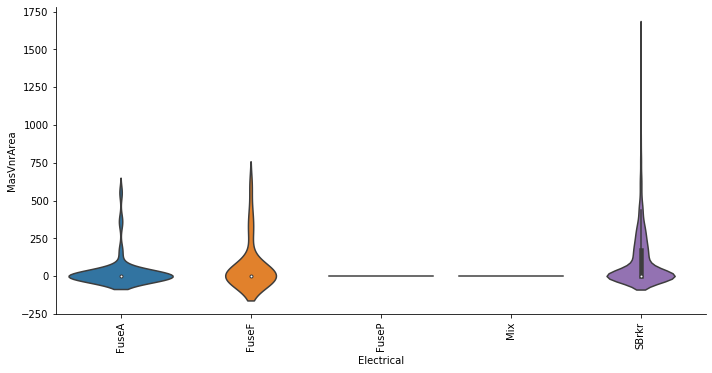

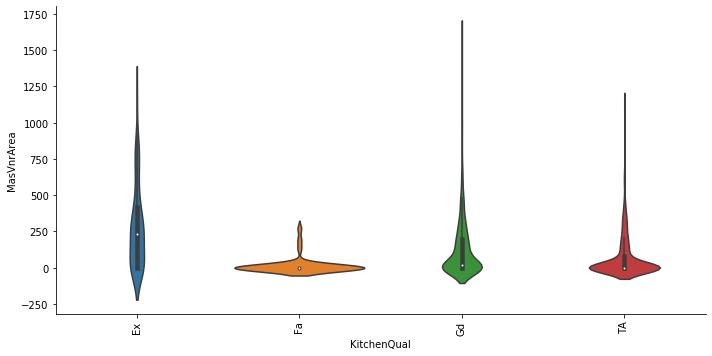

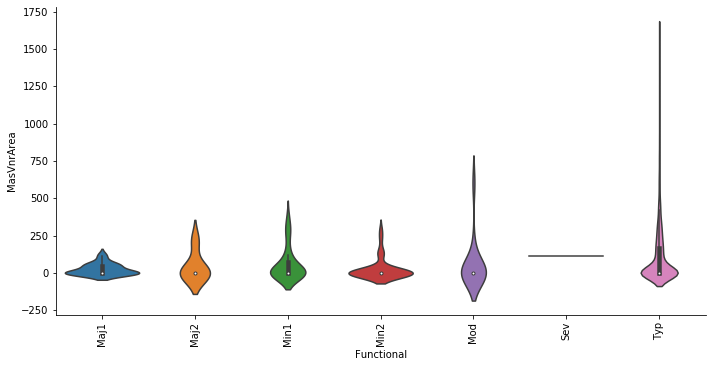

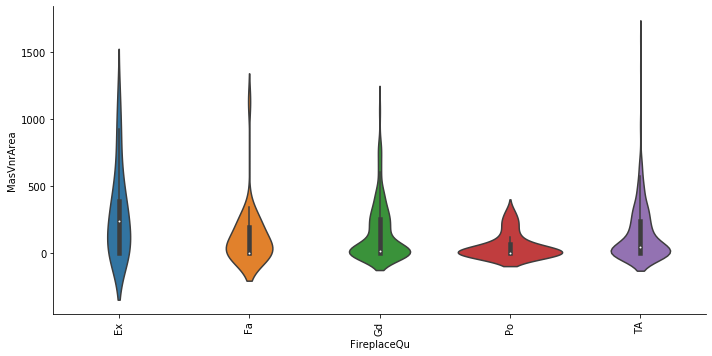

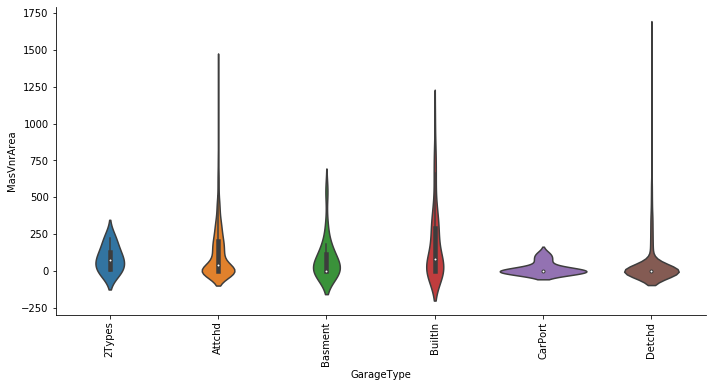

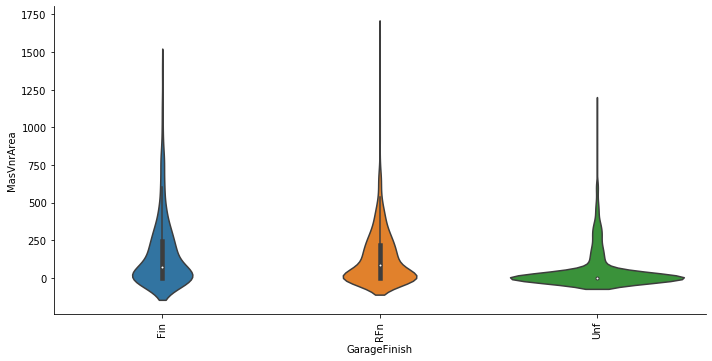

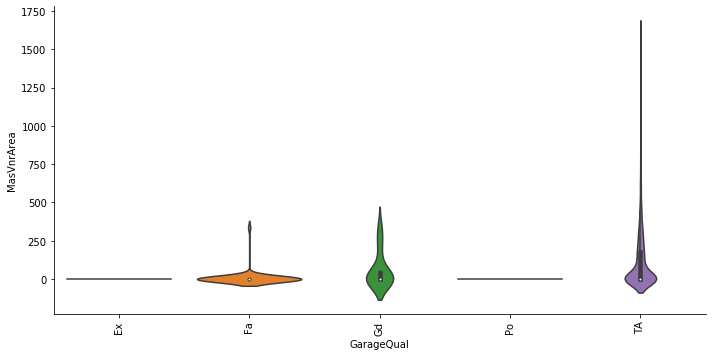

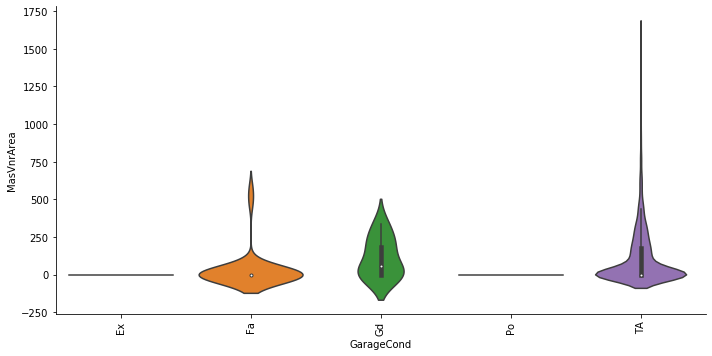

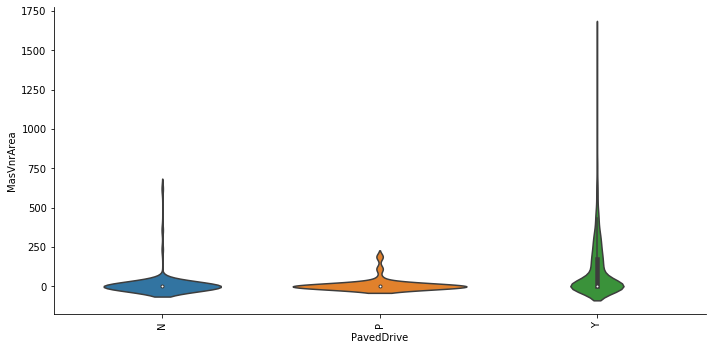

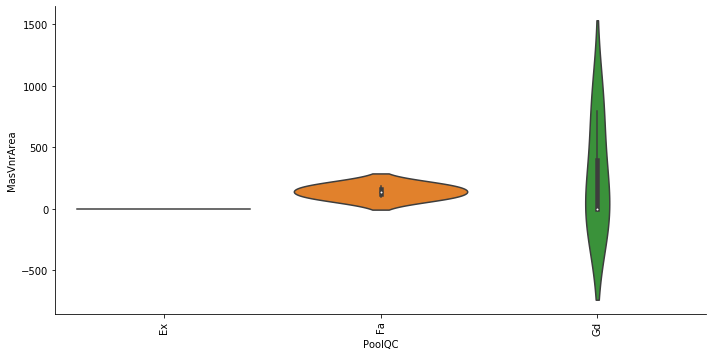

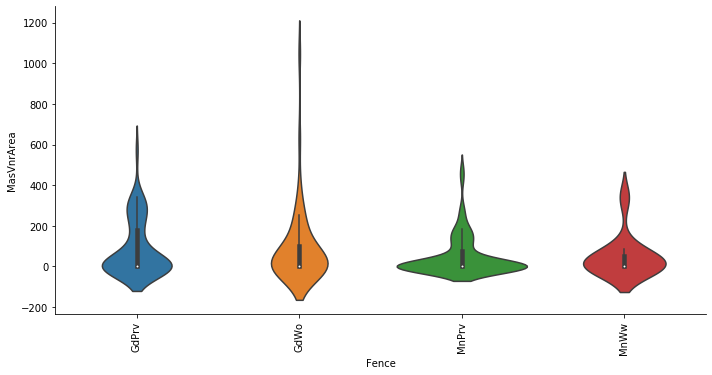

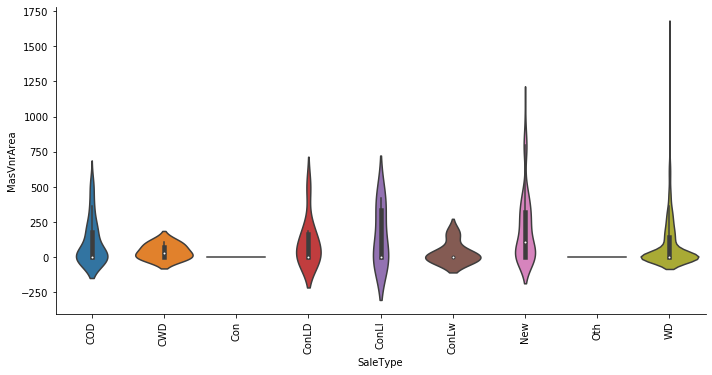

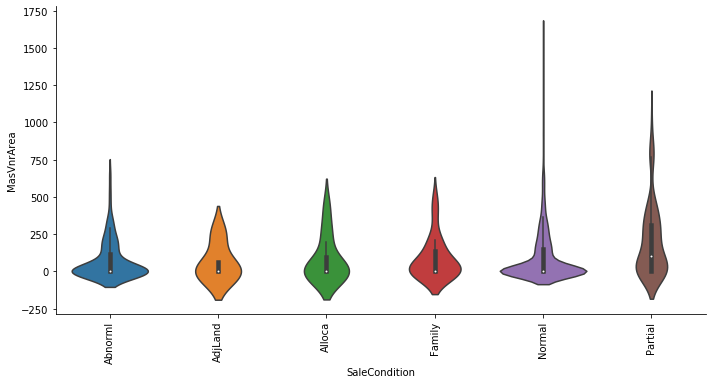

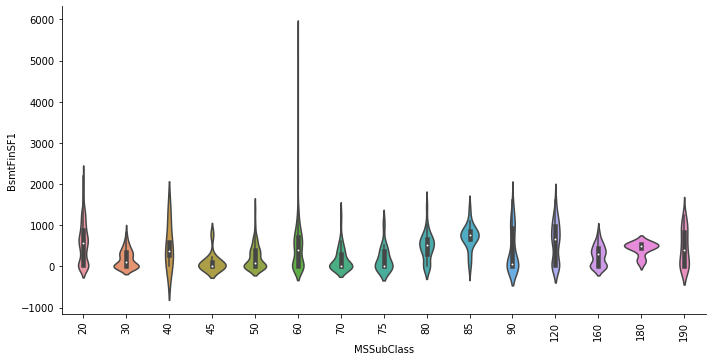

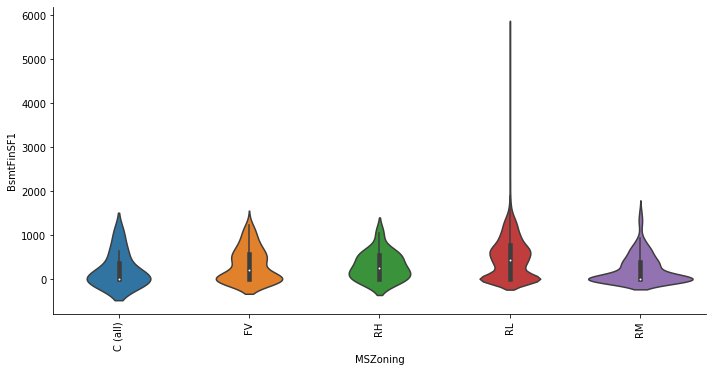

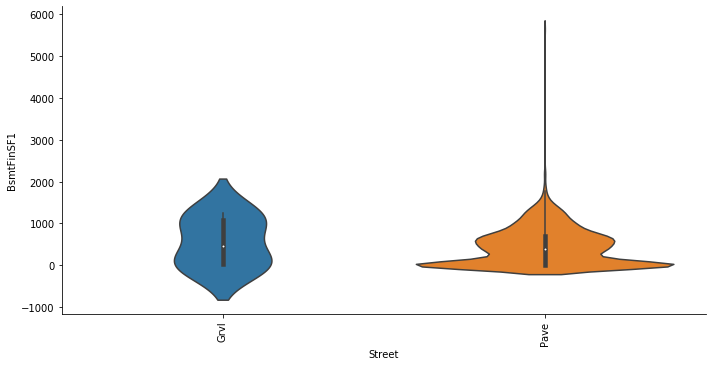

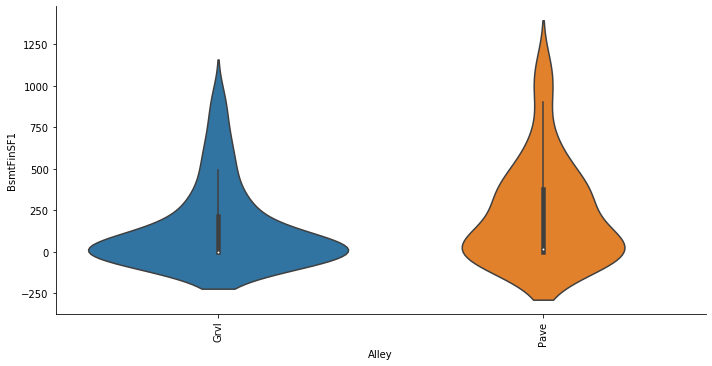

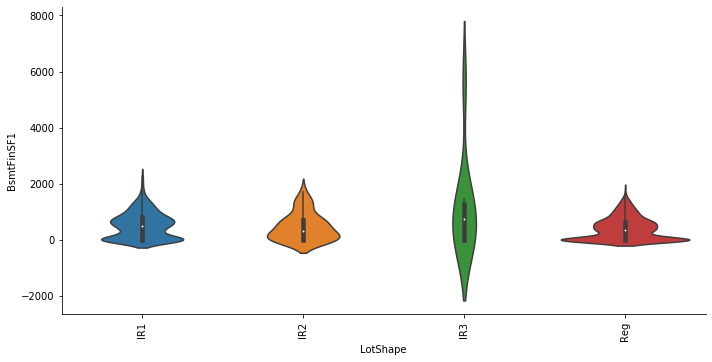

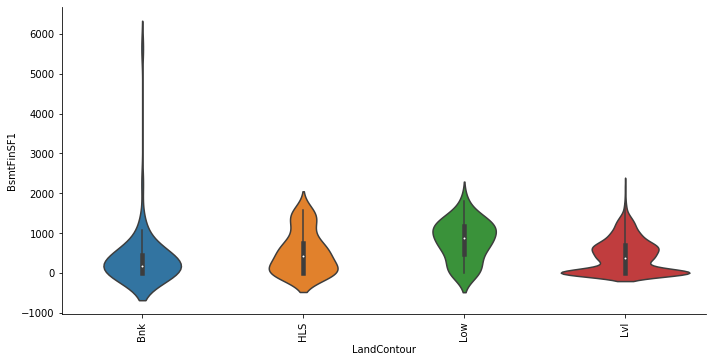

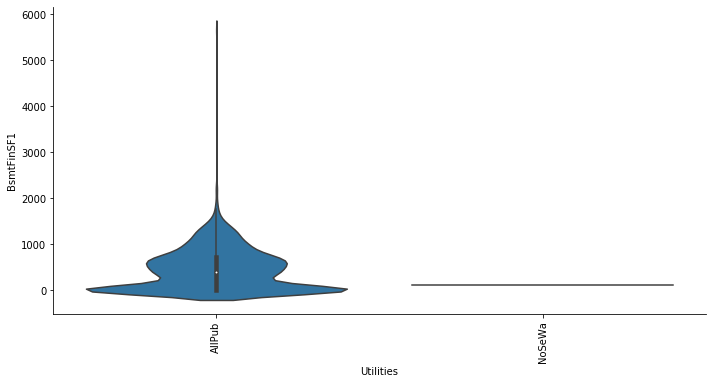

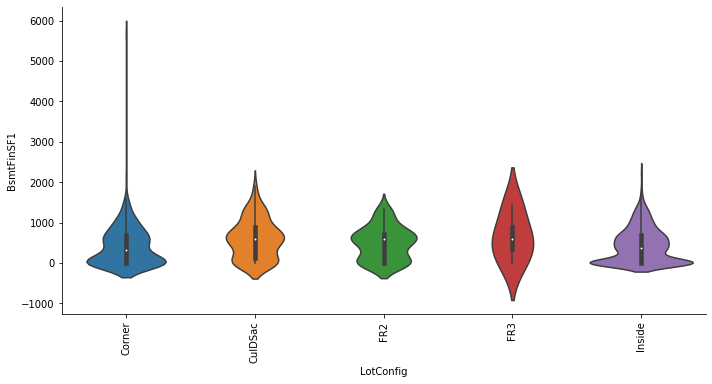

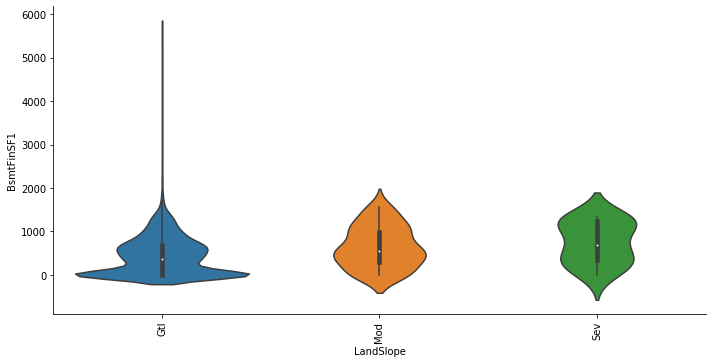

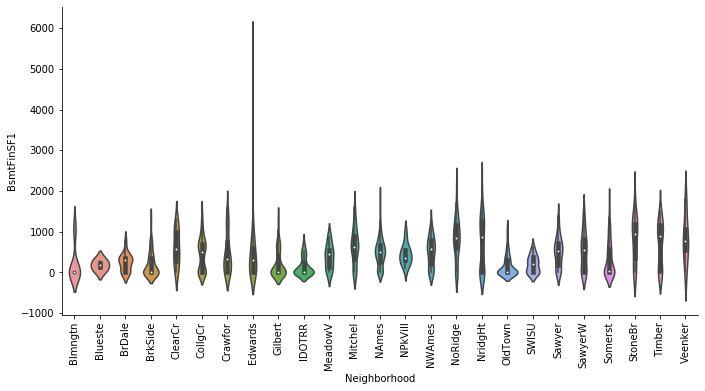

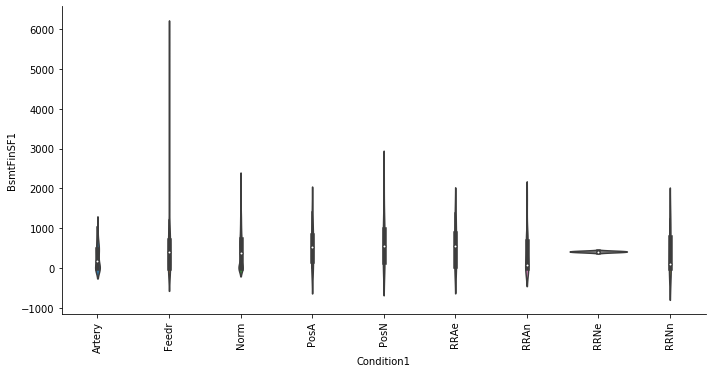

In [ ]:
    # EDA of numeric data
    numeric_eda(df)



In [ ]:
    # Plot time series plot of numeric data
    time_series_plot(df)

In [0]:
eda(df)

In [ ]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

categorical_eda(df)